In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
train=pd.read_csv("./train.csv")
test=pd.read_csv("./test.csv")
submit_sample=pd.read_csv("./sample_submit.csv", header=None)

df = pd.concat([train, test], sort=False)
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 399
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2000 non-null   int64  
 1   age       2000 non-null   int64  
 2   sex       2000 non-null   object 
 3   bmi       2000 non-null   float64
 4   children  2000 non-null   int64  
 5   smoker    2000 non-null   object 
 6   region    2000 non-null   object 
 7   charges   1600 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 140.6+ KB


,id,age,sex,bmi,children,smoker,region,charges
0,0,26,male,32.665465,3,no,southeast,0.0
1,1,41,male,29.798725,1,no,southwest,0.0
2,2,28,male,32.722029,0,yes,northwest,1.0
3,3,20,female,38.429831,2,no,southeast,0.0
4,4,45,female,29.641854,1,no,northwest,0.0
5,5,20,male,37.785937,2,yes,southeast,1.0
6,6,37,male,43.393374,2,no,northeast,0.0
7,7,41,female,32.280407,1,no,northeast,0.0
8,8,40,male,28.865828,1,no,northeast,0.0
9,9,54,female,33.870887,2,no,northeast,0.0


# Pandas Profiling

In [3]:
#import pandas_profiling

# df.profile_report()

### Histogram

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

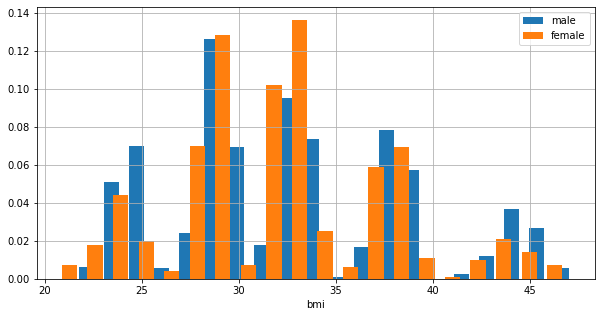

In [5]:
# Histogram BMI (male, female)
plt.figure(figsize=(10, 5))
plt.hist(train[train['sex']=='male']['bmi'], bins=20, label=['male'], rwidth=0.6,density=True)
plt.hist(train[train['sex']=='female']['bmi'], bins=20, label=['female'], rwidth=0.6,density=True)

plt.xlabel('bmi')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

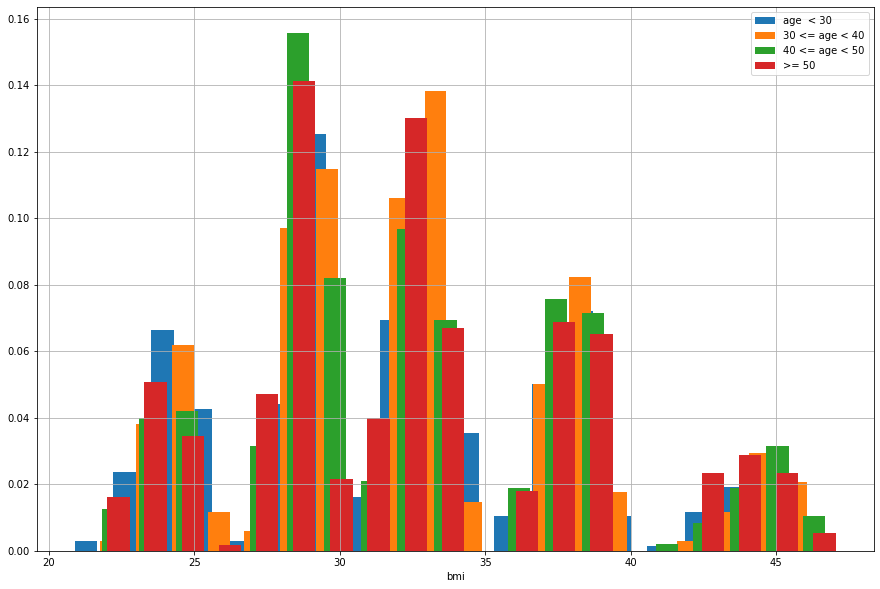

In [6]:
## Histogram BMI (male, female)
plt.figure(figsize=(15, 10))
plt.hist(train.query('age < 30')['bmi'], bins=20, label=['age  < 30'], rwidth=0.6,density=True)
plt.hist(train.query('30 <= age < 40')['bmi'], bins=20, label=['30 <= age < 40'], rwidth=0.6,density=True)
plt.hist(train.query('40 <= age < 50')['bmi'], bins=20, label=['40 <= age < 50'], rwidth=0.6,density=True)
plt.hist(train.query('age >= 50')['bmi'], bins=20, label=['>= 50'], rwidth=0.6,density=True)

plt.xlabel('bmi')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [7]:
print(train['charges'].value_counts()/len(train['charges']))
train_bmi_normal = train.query('bmi < 25')['charges']
print(train_bmi_normal.value_counts()/len(train_bmi_normal))
train_bmi_preobese = train.query('25 <= bmi < 30')['charges']
print(train_bmi_preobese.value_counts()/len(train_bmi_preobese))
train_bmi_obese1 = train.query('30 <= bmi < 35')['charges']
print(train_bmi_obese1.value_counts()/len(train_bmi_obese1))
train_bmi_obese2 = train.query('35 <= bmi < 40')['charges']
print(train_bmi_obese2.value_counts()/len(train_bmi_obese2))
train_bmi_obese3 = train.query('40 <= bmi')['charges']
print(train_bmi_obese3.value_counts()/len(train_bmi_obese3))

0    0.78500
1    0.12375
2    0.09125
Name: charges, dtype: float64
0    0.889423
1    0.100962
2    0.009615
Name: charges, dtype: float64
0    0.770878
1    0.209850
2    0.019272
Name: charges, dtype: float64
0    0.823404
1    0.100000
2    0.076596
Name: charges, dtype: float64
0    0.694534
2    0.228296
1    0.077170
Name: charges, dtype: float64
0    0.750000
2    0.194444
1    0.055556
Name: charges, dtype: float64


In [8]:
# BMI WHO基準
df.loc[df['bmi'] < 25, 'bmi_who'] = 1
df.loc[((df['bmi'] >= 25) & (df['bmi'] < 30)), 'bmi_who'] = 2
df.loc[((df['bmi'] >= 30) & (df['bmi'] < 35)), 'bmi_who'] = 3
df.loc[((df['bmi'] >= 35) & (df['bmi'] < 40)), 'bmi_who'] = 4
df.loc[(df['bmi'] >= 40), 'bmi_who'] = 5
df.head(20)

,id,age,sex,bmi,children,smoker,region,charges,bmi_who
0,0,26,male,32.665465,3,no,southeast,0.0,3.0
1,1,41,male,29.798725,1,no,southwest,0.0,2.0
2,2,28,male,32.722029,0,yes,northwest,1.0,3.0
3,3,20,female,38.429831,2,no,southeast,0.0,4.0
4,4,45,female,29.641854,1,no,northwest,0.0,2.0
5,5,20,male,37.785937,2,yes,southeast,1.0,4.0
6,6,37,male,43.393374,2,no,northeast,0.0,5.0
7,7,41,female,32.280407,1,no,northeast,0.0,3.0
8,8,40,male,28.865828,1,no,northeast,0.0,2.0
9,9,54,female,33.870887,2,no,northeast,0.0,3.0


### Divide dataset into two parts (categorical , numerical)

In [9]:
categorical, numerical = [],[]
for z in df.columns:
    t = df.dtypes[z]
    if t=='object':
        categorical.append(z)
    else:
        numerical.append(z)
print("CategoricaL:\n{}".format(categorical))
print("\nNumericaL:\n{}".format(numerical))

CategoricaL:
['sex', 'smoker', 'region']

NumericaL:
['id', 'age', 'bmi', 'children', 'charges', 'bmi_who']


### Heat map for Correlation coefficient

<AxesSubplot:>

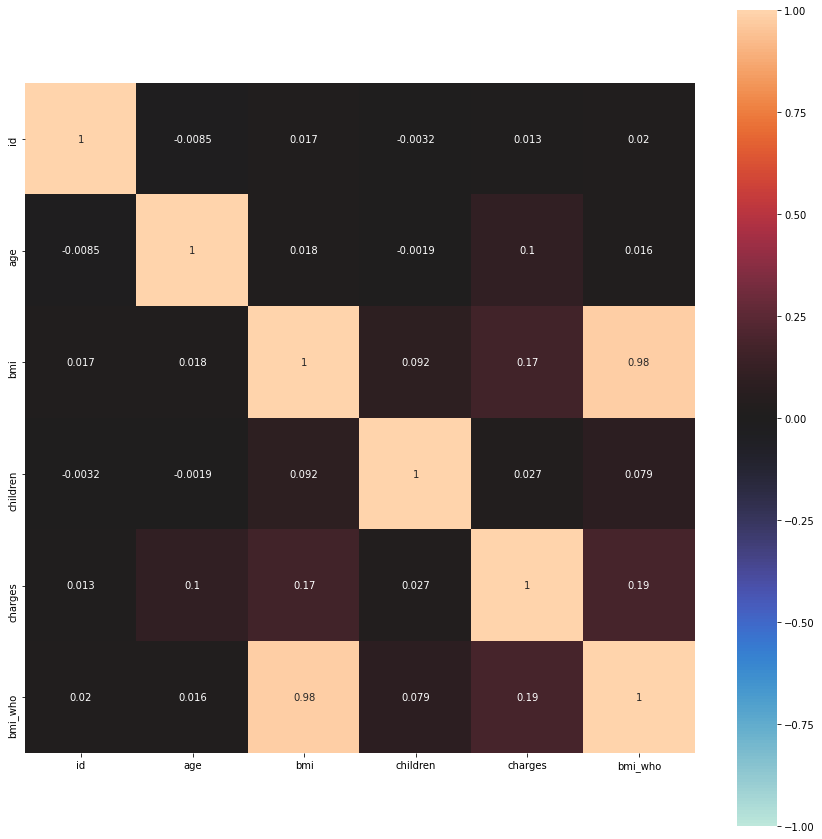

In [10]:
df_corr = df.corr()
plt.figure(figsize=(15, 15)) 
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0, square=True, annot=True)

### Scatter plot

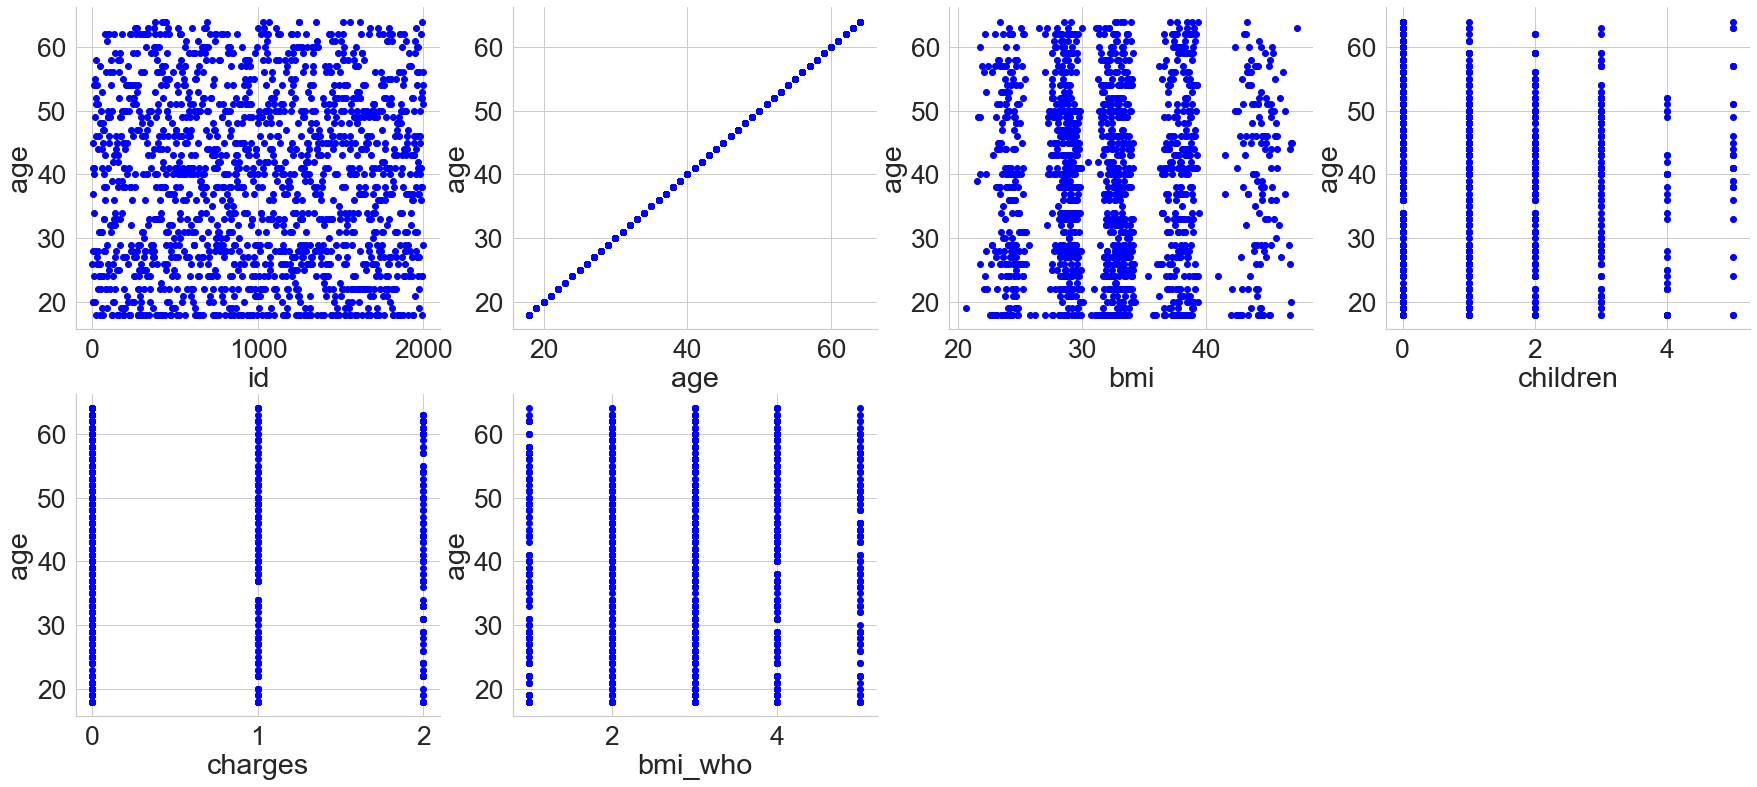

In [11]:
# We shall plot these figures
plt.figure(figsize=(30, 70))
sns.set(font_scale= 2.4)
sns.set_style('whitegrid')

for i, features in enumerate(numerical):
    plt.subplot(10, 4, i+1)
    plt.scatter(data=df.iloc[:len(train)], x=features, y='age', color ="blue")
    plt.xlabel(features)
    plt.ylabel('age')
    
sns.despine()

### Creating Dummy values

In [12]:
df =pd.get_dummies(df, columns=categorical, drop_first=True)

### Separate Data

In [13]:
#df = pd.get_dummies(df)
train = df[:len(train)]
test = df[len(train):]
df.head()

,id,age,bmi,children,charges,bmi_who,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,26,32.665465,3,0.0,3.0,1,0,0,1,0
1,1,41,29.798725,1,0.0,2.0,1,0,0,0,1
2,2,28,32.722029,0,1.0,3.0,1,1,1,0,0
3,3,20,38.429831,2,0.0,4.0,0,0,0,1,0
4,4,45,29.641854,1,0.0,2.0,0,0,1,0,0


### LightGBM

In [14]:
y_train = train['charges']
X_train = train.drop(['id','charges'], axis=1)
X_test = test.drop(['id','charges'], axis=1)


In [15]:
import optuna.integration.lightgbm as lgb # Optuna 
#import lightgbm as lgb 
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import f1_score

In [16]:
y_lgb_preds = []
models = []
y_lgb_oof_train = np.zeros((len(X_train),3))
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

params = {
    'task' : 'train',
    'boosting_type' : 'gbdt',
    'objective': 'multiclass',
    'num_class': 3,
    'metric' : 'multi_logloss',
    'max_bin' : 255,
    'num_leaves' : 40,
    'learning_rate' : 0.01,
    'feature_fraction' : 0.9,
    'bagging_fraction' : 0.8,
    'bagging_freq': 5,
    'verbose' : -1
}

# Cross Validation
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train,y_train)):
    X_tr = X_train.iloc[train_index, :]
    X_val = X_train.iloc[valid_index, :]
    y_tr = y_train.iloc[train_index]
    y_val = y_train.iloc[valid_index]
    
    # Train Dataset
    lgb_train = lgb.Dataset(X_tr, y_tr)

    # Evaluation Dataset (early_stopping_rounds)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    
    evals_result = {} #結果を格納するための辞書
    # train
    gbm = lgb.train(params,
                    lgb_train,
                    valid_sets=[lgb_train, lgb_eval],
                    valid_names=['train','eval'],
                    num_boost_round=1000,
                    early_stopping_rounds=10,
                    verbose_eval=100,
                    evals_result=evals_result
                   )
    # Out-of-hold of train data
    y_lgb_oof_train[valid_index] = \
        gbm.predict(X_val, num_iteration=gbm.best_iteration)
    
    # Prediction for X_test data
    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    
    # Append Prediction data 
    y_lgb_preds.append(y_pred)
    models.append(gbm)


[I 2021-06-12 21:11:58,650] A new study created in memory with name: no-name-fab33987-c69b-48c5-bc69-1588052f0f1c
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.37984	eval's multi_logloss: 0.432986
[200]	train's multi_logloss: 0.280768	eval's multi_logloss: 0.380267
Early stopping, best iteration is:
[276]	train's multi_logloss: 0.234577	eval's multi_logloss: 0.365956


feature_fraction, val_score: 0.365956:  14%|######4                                      | 1/7 [00:01<00:06,  1.10s/it]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.345044	eval's multi_logloss: 0.39215
[200]	train's multi_logloss: 0.249504	eval's multi_logloss: 0.356125
Early stopping, best iteration is:
[225]	train's multi_logloss: 0.233123	eval's multi_logloss: 0.3531


feature_fraction, val_score: 0.353100:  29%|############8                                | 2/7 [00:01<00:04,  1.03it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246705	eval's multi_logloss: 0.350544
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233547	eval's multi_logloss: 0.348134


feature_fraction, val_score: 0.348134:  43%|###################2                         | 3/7 [00:02<00:03,  1.03it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.37984	eval's multi_logloss: 0.432986
[200]	train's multi_logloss: 0.280768	eval's multi_logloss: 0.380267


feature_fraction, val_score: 0.348134:  43%|###################2                         | 3/7 [00:04<00:03,  1.03it/s]

Early stopping, best iteration is:
[276]	train's multi_logloss: 0.234577	eval's multi_logloss: 0.365956


feature_fraction, val_score: 0.348134:  57%|#########################7                   | 4/7 [00:04<00:03,  1.03s/it]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.3516	eval's multi_logloss: 0.399054
[200]	train's multi_logloss: 0.254276	eval's multi_logloss: 0.357537
Early stopping, best iteration is:
[241]	train's multi_logloss: 0.227711	eval's multi_logloss: 0.352278


feature_fraction, val_score: 0.348134:  71%|################################1            | 5/7 [00:05<00:02,  1.01s/it]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.481469	eval's multi_logloss: 0.546981
[200]	train's multi_logloss: 0.388773	eval's multi_logloss: 0.503611
Early stopping, best iteration is:
[279]	train's multi_logloss: 0.339319	eval's multi_logloss: 0.484384


feature_fraction, val_score: 0.348134:  86%|######################################5      | 6/7 [00:05<00:00,  1.01it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.364245	eval's multi_logloss: 0.414978
[200]	train's multi_logloss: 0.265242	eval's multi_logloss: 0.366107
Early stopping, best iteration is:
[257]	train's multi_logloss: 0.229109	eval's multi_logloss: 0.35894


num_leaves, val_score: 0.348134:   0%|                                                          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.414792	eval's multi_logloss: 0.406533
[200]	train's multi_logloss: 0.370958	eval's multi_logloss: 0.36887
[300]	train's multi_logloss: 0.350392	eval's multi_logloss: 0.35756


num_leaves, val_score: 0.348134:   5%|##5                                               | 1/20 [00:00<00:04,  3.94it/s]

Early stopping, best iteration is:
[303]	train's multi_logloss: 0.349956	eval's multi_logloss: 0.357462
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.348134:  10%|#####                                             | 2/20 [00:01<00:10,  1.76it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.348134:  15%|#######5                                          | 3/20 [00:01<00:12,  1.40it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.391752	eval's multi_logloss: 0.389953
[200]	train's multi_logloss: 0.339984	eval's multi_logloss: 0.352114


num_leaves, val_score: 0.345462:  20%|##########                                        | 4/20 [00:02<00:08,  1.82it/s]

Early stopping, best iteration is:
[274]	train's multi_logloss: 0.32093	eval's multi_logloss: 0.345462
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.345462:  25%|############5                                     | 5/20 [00:03<00:10,  1.48it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.345462:  30%|###############                                   | 6/20 [00:03<00:10,  1.37it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.345462:  35%|#################5                                | 7/20 [00:04<00:10,  1.28it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.345462:  40%|####################                              | 8/20 [00:05<00:09,  1.24it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.345462:  45%|######################5                           | 9/20 [00:06<00:08,  1.23it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.345462:  50%|########################5                        | 10/20 [00:07<00:08,  1.22it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.365961	eval's multi_logloss: 0.387791


num_leaves, val_score: 0.345462:  55%|##########################9                      | 11/20 [00:07<00:06,  1.44it/s]

[200]	train's multi_logloss: 0.29854	eval's multi_logloss: 0.35105
Early stopping, best iteration is:
[235]	train's multi_logloss: 0.28465	eval's multi_logloss: 0.348761
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.345462:  60%|#############################4                   | 12/20 [00:08<00:05,  1.37it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.345462:  65%|###############################8                 | 13/20 [00:09<00:05,  1.25it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.345462:  70%|##################################3              | 14/20 [00:10<00:05,  1.19it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.345462:  75%|####################################7            | 15/20 [00:11<00:04,  1.20it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341383	eval's multi_logloss: 0.385535
[200]	train's multi_logloss: 0.248483	eval's multi_logloss: 0.350974
Early stopping, best iteration is:
[226]	train's multi_logloss: 0.231727	eval's multi_logloss: 0.348845


num_leaves, val_score: 0.345462:  80%|#######################################2         | 16/20 [00:12<00:03,  1.23it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.345462:  85%|#########################################6       | 17/20 [00:12<00:02,  1.20it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.345462:  90%|############################################1    | 18/20 [00:13<00:01,  1.18it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.345462:  95%|##############################################5  | 19/20 [00:14<00:00,  1.18it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


bagging, val_score: 0.345462:   0%|                                                             | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.394054	eval's multi_logloss: 0.395849


bagging, val_score: 0.345462:  10%|#####3                                               | 1/10 [00:00<00:03,  2.78it/s]

[200]	train's multi_logloss: 0.343639	eval's multi_logloss: 0.359072
Early stopping, best iteration is:
[264]	train's multi_logloss: 0.327042	eval's multi_logloss: 0.352186
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.345367:  10%|#####3                                               | 1/10 [00:00<00:03,  2.78it/s]

[100]	train's multi_logloss: 0.390516	eval's multi_logloss: 0.38998
[200]	train's multi_logloss: 0.338976	eval's multi_logloss: 0.350041
Early stopping, best iteration is:
[240]	train's multi_logloss: 0.327642	eval's multi_logloss: 0.345367


bagging, val_score: 0.345367:  20%|##########6                                          | 2/10 [00:00<00:02,  2.92it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.390992	eval's multi_logloss: 0.388922
[200]	train's multi_logloss: 0.338798	eval's multi_logloss: 0.351059


bagging, val_score: 0.345176:  30%|###############9                                     | 3/10 [00:01<00:02,  2.73it/s]

[300]	train's multi_logloss: 0.313823	eval's multi_logloss: 0.345337
Early stopping, best iteration is:
[302]	train's multi_logloss: 0.313466	eval's multi_logloss: 0.345176
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.391087	eval's multi_logloss: 0.389441


bagging, val_score: 0.345176:  40%|#####################2                               | 4/10 [00:01<00:02,  2.89it/s]

[200]	train's multi_logloss: 0.338763	eval's multi_logloss: 0.350049
Early stopping, best iteration is:
[239]	train's multi_logloss: 0.327938	eval's multi_logloss: 0.346264
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.390749	eval's multi_logloss: 0.390411
[200]	train's multi_logloss: 0.338457	eval's multi_logloss: 0.352836


bagging, val_score: 0.345176:  50%|##########################5                          | 5/10 [00:01<00:01,  2.74it/s]

Early stopping, best iteration is:
[263]	train's multi_logloss: 0.320912	eval's multi_logloss: 0.347644
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.391431	eval's multi_logloss: 0.388785


bagging, val_score: 0.342982:  60%|###############################8                     | 6/10 [00:02<00:01,  2.69it/s]

[200]	train's multi_logloss: 0.339752	eval's multi_logloss: 0.349078
Early stopping, best iteration is:
[274]	train's multi_logloss: 0.32092	eval's multi_logloss: 0.342982
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.342982:  70%|#####################################                | 7/10 [00:02<00:01,  2.95it/s]

[100]	train's multi_logloss: 0.392111	eval's multi_logloss: 0.392325
[200]	train's multi_logloss: 0.339848	eval's multi_logloss: 0.352944
Early stopping, best iteration is:
[238]	train's multi_logloss: 0.328771	eval's multi_logloss: 0.348781
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.39165	eval's multi_logloss: 0.389648
[200]	train's multi_logloss: 0.339767	eval's multi_logloss: 0.350115
Early stopping, best iteration is:
[264]	train's multi_logloss: 0.32269	eval's multi_logloss: 0.346135


bagging, val_score: 0.342982:  80%|##########################################4          | 8/10 [00:02<00:00,  2.99it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.391532	eval's multi_logloss: 0.388921
[200]	train's multi_logloss: 0.339883	eval's multi_logloss: 0.35344


bagging, val_score: 0.342982:  90%|###############################################7     | 9/10 [00:03<00:00,  3.17it/s]

Early stopping, best iteration is:
[240]	train's multi_logloss: 0.328309	eval's multi_logloss: 0.349523
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.392987	eval's multi_logloss: 0.392494


feature_fraction_stage2, val_score: 0.342982:   0%|                                              | 0/3 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.340752	eval's multi_logloss: 0.352725
Early stopping, best iteration is:
[215]	train's multi_logloss: 0.336209	eval's multi_logloss: 0.351088
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.39608	eval's multi_logloss: 0.395874


feature_fraction_stage2, val_score: 0.342982:  33%|############6                         | 1/3 [00:00<00:00,  3.29it/s]

[200]	train's multi_logloss: 0.341499	eval's multi_logloss: 0.352768
Early stopping, best iteration is:
[268]	train's multi_logloss: 0.323688	eval's multi_logloss: 0.346139
Training until validation scores don't improve for 10 rounds


feature_fraction_stage2, val_score: 0.342982:  33%|############6                         | 1/3 [00:00<00:00,  3.29it/s]

[100]	train's multi_logloss: 0.391431	eval's multi_logloss: 0.388785
[200]	train's multi_logloss: 0.339752	eval's multi_logloss: 0.349078
Early stopping, best iteration is:
[274]	train's multi_logloss: 0.32092	eval's multi_logloss: 0.342982


feature_fraction_stage2, val_score: 0.342982:  67%|#########################3            | 2/3 [00:00<00:00,  3.30it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.391431	eval's multi_logloss: 0.388785
[200]	train's multi_logloss: 0.339752	eval's multi_logloss: 0.349078


regularization_factors, val_score: 0.342982:   0%|                                              | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[274]	train's multi_logloss: 0.32092	eval's multi_logloss: 0.342982
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.392304	eval's multi_logloss: 0.38953


regularization_factors, val_score: 0.342982:   5%|#9                                    | 1/20 [00:00<00:06,  2.90it/s]

[200]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.349489
Early stopping, best iteration is:
[274]	train's multi_logloss: 0.322624	eval's multi_logloss: 0.343122
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.396916	eval's multi_logloss: 0.39274
[200]	train's multi_logloss: 0.345643	eval's multi_logloss: 0.351899
[300]	train's multi_logloss: 0.323636	eval's multi_logloss: 0.342923


regularization_factors, val_score: 0.342923:  10%|###8                                  | 2/20 [00:00<00:06,  2.70it/s]

Early stopping, best iteration is:
[300]	train's multi_logloss: 0.323636	eval's multi_logloss: 0.342923
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.391431	eval's multi_logloss: 0.388785


regularization_factors, val_score: 0.342923:  15%|#####7                                | 3/20 [00:01<00:05,  2.91it/s]

[200]	train's multi_logloss: 0.339752	eval's multi_logloss: 0.349078
Early stopping, best iteration is:
[274]	train's multi_logloss: 0.32092	eval's multi_logloss: 0.342982
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.391825	eval's multi_logloss: 0.389681
[200]	train's multi_logloss: 0.34063	eval's multi_logloss: 0.349542
Early stopping, best iteration is:
[274]	train's multi_logloss: 0.322081	eval's multi_logloss: 0.343269


regularization_factors, val_score: 0.342923:  20%|#######6                              | 4/20 [00:01<00:05,  2.98it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.391432	eval's multi_logloss: 0.388786


regularization_factors, val_score: 0.342923:  25%|#########5                            | 5/20 [00:01<00:05,  2.93it/s]

[200]	train's multi_logloss: 0.339753	eval's multi_logloss: 0.349078
Early stopping, best iteration is:
[274]	train's multi_logloss: 0.320921	eval's multi_logloss: 0.342982
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.342923:  30%|###########4                          | 6/20 [00:02<00:04,  3.07it/s]

[100]	train's multi_logloss: 0.392399	eval's multi_logloss: 0.389499
[200]	train's multi_logloss: 0.341592	eval's multi_logloss: 0.349586
Early stopping, best iteration is:
[272]	train's multi_logloss: 0.323854	eval's multi_logloss: 0.343354
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.391365	eval's multi_logloss: 0.388842
[200]	train's multi_logloss: 0.339723	eval's multi_logloss: 0.349194


regularization_factors, val_score: 0.342923:  35%|#############3                        | 7/20 [00:02<00:04,  3.14it/s]

Early stopping, best iteration is:
[274]	train's multi_logloss: 0.320932	eval's multi_logloss: 0.343148
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.391437	eval's multi_logloss: 0.388792


regularization_factors, val_score: 0.342923:  40%|###############2                      | 8/20 [00:02<00:03,  3.22it/s]

[200]	train's multi_logloss: 0.339759	eval's multi_logloss: 0.349081
Early stopping, best iteration is:
[274]	train's multi_logloss: 0.320943	eval's multi_logloss: 0.342967
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.391416	eval's multi_logloss: 0.38898
[200]	train's multi_logloss: 0.33991	eval's multi_logloss: 0.349244


regularization_factors, val_score: 0.342923:  45%|#################1                    | 9/20 [00:02<00:03,  3.02it/s]

Early stopping, best iteration is:
[274]	train's multi_logloss: 0.321279	eval's multi_logloss: 0.343264
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.391431	eval's multi_logloss: 0.388859


regularization_factors, val_score: 0.342923:  50%|##################5                  | 10/20 [00:03<00:03,  3.10it/s]

[200]	train's multi_logloss: 0.339797	eval's multi_logloss: 0.349149
Early stopping, best iteration is:
[274]	train's multi_logloss: 0.321096	eval's multi_logloss: 0.343183
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.409528	eval's multi_logloss: 0.404031
[200]	train's multi_logloss: 0.356637	eval's multi_logloss: 0.359203
[300]	train's multi_logloss: 0.335023	eval's multi_logloss: 0.3464


regularization_factors, val_score: 0.342923:  55%|####################3                | 11/20 [00:03<00:03,  2.90it/s]

Early stopping, best iteration is:
[366]	train's multi_logloss: 0.325708	eval's multi_logloss: 0.344562
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.391431	eval's multi_logloss: 0.388785


regularization_factors, val_score: 0.342923:  60%|######################2              | 12/20 [00:03<00:02,  3.01it/s]

[200]	train's multi_logloss: 0.339752	eval's multi_logloss: 0.349078
Early stopping, best iteration is:
[274]	train's multi_logloss: 0.32092	eval's multi_logloss: 0.342982
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.409893	eval's multi_logloss: 0.404268
[200]	train's multi_logloss: 0.356969	eval's multi_logloss: 0.359388
[300]	train's multi_logloss: 0.335328	eval's multi_logloss: 0.346472


regularization_factors, val_score: 0.342923:  65%|########################             | 13/20 [00:04<00:02,  2.75it/s]

Early stopping, best iteration is:
[366]	train's multi_logloss: 0.326045	eval's multi_logloss: 0.344526
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.392385	eval's multi_logloss: 0.389596


regularization_factors, val_score: 0.342923:  70%|#########################9           | 14/20 [00:04<00:02,  2.87it/s]

[200]	train's multi_logloss: 0.341149	eval's multi_logloss: 0.349513
Early stopping, best iteration is:
[274]	train's multi_logloss: 0.322782	eval's multi_logloss: 0.343499
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.391431	eval's multi_logloss: 0.388785
[200]	train's multi_logloss: 0.339752	eval's multi_logloss: 0.349078
Early stopping, best iteration is:
[274]	train's multi_logloss: 0.32092	eval's multi_logloss: 0.342982


regularization_factors, val_score: 0.342923:  75%|###########################7         | 15/20 [00:05<00:01,  2.83it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.39143	eval's multi_logloss: 0.38903
[200]	train's multi_logloss: 0.339951	eval's multi_logloss: 0.349349


regularization_factors, val_score: 0.342923:  80%|#############################6       | 16/20 [00:05<00:01,  2.84it/s]

Early stopping, best iteration is:
[273]	train's multi_logloss: 0.321529	eval's multi_logloss: 0.3432
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.419082	eval's multi_logloss: 0.414733
[200]	train's multi_logloss: 0.372462	eval's multi_logloss: 0.372849
[300]	train's multi_logloss: 0.354774	eval's multi_logloss: 0.359622
[400]	train's multi_logloss: 0.345729	eval's multi_logloss: 0.354377


regularization_factors, val_score: 0.342923:  85%|###############################4     | 17/20 [00:06<00:01,  2.35it/s]

[500]	train's multi_logloss: 0.340157	eval's multi_logloss: 0.35183
Early stopping, best iteration is:
[546]	train's multi_logloss: 0.338121	eval's multi_logloss: 0.350806
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.342923:  85%|###############################4     | 17/20 [00:06<00:01,  2.35it/s]

[100]	train's multi_logloss: 0.391433	eval's multi_logloss: 0.388787
[200]	train's multi_logloss: 0.339754	eval's multi_logloss: 0.349079
Early stopping, best iteration is:
[274]	train's multi_logloss: 0.320954	eval's multi_logloss: 0.342951


regularization_factors, val_score: 0.342923:  90%|#################################3   | 18/20 [00:06<00:00,  2.54it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.391432	eval's multi_logloss: 0.388786
[200]	train's multi_logloss: 0.339753	eval's multi_logloss: 0.349078


regularization_factors, val_score: 0.342923:  95%|###################################1 | 19/20 [00:06<00:00,  2.72it/s]

Early stopping, best iteration is:
[274]	train's multi_logloss: 0.320953	eval's multi_logloss: 0.34295
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.391432	eval's multi_logloss: 0.388786


min_data_in_leaf, val_score: 0.342923:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.339753	eval's multi_logloss: 0.349078
Early stopping, best iteration is:
[274]	train's multi_logloss: 0.32092	eval's multi_logloss: 0.342982
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.411351	eval's multi_logloss: 0.410641
[200]	train's multi_logloss: 0.364339	eval's multi_logloss: 0.371183
[300]	train's multi_logloss: 0.340817	eval's multi_logloss: 0.355211


min_data_in_leaf, val_score: 0.342923:  20%|#########                                    | 1/5 [00:00<00:01,  2.37it/s]

Early stopping, best iteration is:
[354]	train's multi_logloss: 0.332854	eval's multi_logloss: 0.352617
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.39562	eval's multi_logloss: 0.392068


min_data_in_leaf, val_score: 0.342923:  40%|##################                           | 2/5 [00:00<00:01,  2.85it/s]

[200]	train's multi_logloss: 0.344147	eval's multi_logloss: 0.350743
Early stopping, best iteration is:
[276]	train's multi_logloss: 0.326161	eval's multi_logloss: 0.343225
Training until validation scores don't improve for 10 rounds


min_data_in_leaf, val_score: 0.342923:  40%|##################                           | 2/5 [00:01<00:01,  2.85it/s]

[100]	train's multi_logloss: 0.39544	eval's multi_logloss: 0.393109
[200]	train's multi_logloss: 0.343681	eval's multi_logloss: 0.351606
Early stopping, best iteration is:
[276]	train's multi_logloss: 0.325506	eval's multi_logloss: 0.344095


min_data_in_leaf, val_score: 0.342923:  60%|###########################                  | 3/5 [00:01<00:00,  3.04it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.397573	eval's multi_logloss: 0.393484
[200]	train's multi_logloss: 0.346751	eval's multi_logloss: 0.352712


min_data_in_leaf, val_score: 0.342923:  80%|####################################         | 4/5 [00:01<00:00,  3.07it/s]

[300]	train's multi_logloss: 0.324953	eval's multi_logloss: 0.343692
Early stopping, best iteration is:
[300]	train's multi_logloss: 0.324953	eval's multi_logloss: 0.343692
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402424	eval's multi_logloss: 0.398796
[200]	train's multi_logloss: 0.352468	eval's multi_logloss: 0.357326
[300]	train's multi_logloss: 0.330823	eval's multi_logloss: 0.346333
[400]	train's multi_logloss: 0.315862	eval's multi_logloss: 0.34431
Early stopping, best iteration is:
[396]	train's multi_logloss: 0.316308	eval's multi_logloss: 0.344234


min_data_in_leaf, val_score: 0.342923: 100%|#############################################| 5/5 [00:01<00:00,  2.84it/s]
[I 2021-06-12 21:12:34,482] A new study created in memory with name: no-name-a96223ed-4b21-4237-8014-0f32a81ac1d6
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.381127	eval's multi_logloss: 0.430084
[200]	train's multi_logloss: 0.284384	eval's multi_logloss: 0.378444
[300]	train's multi_logloss: 0.226521	eval's multi_logloss: 0.366542
Early stopping, best iteration is:
[310]	train's multi_logloss: 0.222284	eval's multi_logloss: 0.365667


feature_fraction, val_score: 0.365667:  14%|######4                                      | 1/7 [00:01<00:06,  1.01s/it]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.341504	eval's multi_logloss: 0.397872


feature_fraction, val_score: 0.365667:  29%|############8                                | 2/7 [00:01<00:04,  1.22it/s]

[200]	train's multi_logloss: 0.249744	eval's multi_logloss: 0.366796
Early stopping, best iteration is:
[204]	train's multi_logloss: 0.247109	eval's multi_logloss: 0.366534
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.350243	eval's multi_logloss: 0.404597
[200]	train's multi_logloss: 0.255928	eval's multi_logloss: 0.368004
Early stopping, best iteration is:
[241]	train's multi_logloss: 0.229667	eval's multi_logloss: 0.365853


feature_fraction, val_score: 0.365667:  43%|###################2                         | 3/7 [00:02<00:03,  1.23it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.364001	eval's multi_logloss: 0.41608
[200]	train's multi_logloss: 0.267114	eval's multi_logloss: 0.371177
Early stopping, best iteration is:
[248]	train's multi_logloss: 0.237328	eval's multi_logloss: 0.366799


feature_fraction, val_score: 0.365667:  57%|#########################7                   | 4/7 [00:03<00:02,  1.21it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.381127	eval's multi_logloss: 0.430084
[200]	train's multi_logloss: 0.284384	eval's multi_logloss: 0.378444
[300]	train's multi_logloss: 0.226521	eval's multi_logloss: 0.366542
Early stopping, best iteration is:
[310]	train's multi_logloss: 0.222284	eval's multi_logloss: 0.365667


feature_fraction, val_score: 0.365667:  71%|################################1            | 5/7 [00:04<00:01,  1.14it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789


feature_fraction, val_score: 0.363713:  86%|######################################5      | 6/7 [00:05<00:00,  1.21it/s]

[200]	train's multi_logloss: 0.246222	eval's multi_logloss: 0.363713
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246222	eval's multi_logloss: 0.363713
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.483765	eval's multi_logloss: 0.549818
[200]	train's multi_logloss: 0.392999	eval's multi_logloss: 0.50598
Early stopping, best iteration is:
[279]	train's multi_logloss: 0.344877	eval's multi_logloss: 0.483434


num_leaves, val_score: 0.363713:   0%|                                                          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.336854	eval's multi_logloss: 0.392788


num_leaves, val_score: 0.363713:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.246305	eval's multi_logloss: 0.364117
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246305	eval's multi_logloss: 0.364117


num_leaves, val_score: 0.363713:   5%|##5                                               | 1/20 [00:00<00:14,  1.33it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789


num_leaves, val_score: 0.363713:  10%|#####                                             | 2/20 [00:01<00:14,  1.23it/s]

[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.338421	eval's multi_logloss: 0.39221


num_leaves, val_score: 0.362750:  15%|#######5                                          | 3/20 [00:02<00:12,  1.38it/s]

[200]	train's multi_logloss: 0.252295	eval's multi_logloss: 0.36275
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.252295	eval's multi_logloss: 0.36275
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789


num_leaves, val_score: 0.362750:  15%|#######5                                          | 3/20 [00:03<00:12,  1.38it/s]

[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725


num_leaves, val_score: 0.362750:  20%|##########                                        | 4/20 [00:03<00:12,  1.31it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789


num_leaves, val_score: 0.362750:  25%|############5                                     | 5/20 [00:03<00:11,  1.31it/s]

[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789


num_leaves, val_score: 0.362750:  25%|############5                                     | 5/20 [00:04<00:11,  1.31it/s]

[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725


num_leaves, val_score: 0.362750:  30%|###############                                   | 6/20 [00:04<00:11,  1.27it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.336855	eval's multi_logloss: 0.392789


num_leaves, val_score: 0.362750:  35%|#################5                                | 7/20 [00:05<00:09,  1.32it/s]

[200]	train's multi_logloss: 0.246511	eval's multi_logloss: 0.363771
Early stopping, best iteration is:
[202]	train's multi_logloss: 0.245066	eval's multi_logloss: 0.363754
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789


num_leaves, val_score: 0.362750:  40%|####################                              | 8/20 [00:06<00:08,  1.35it/s]

[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789


num_leaves, val_score: 0.362750:  45%|######################5                           | 9/20 [00:06<00:08,  1.36it/s]

[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725


num_leaves, val_score: 0.362750:  50%|########################5                        | 10/20 [00:07<00:08,  1.23it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.458246	eval's multi_logloss: 0.452299
[200]	train's multi_logloss: 0.410469	eval's multi_logloss: 0.408909
[300]	train's multi_logloss: 0.387953	eval's multi_logloss: 0.394375
[400]	train's multi_logloss: 0.373749	eval's multi_logloss: 0.381576


num_leaves, val_score: 0.362750:  55%|##########################9                      | 11/20 [00:08<00:06,  1.48it/s]

[500]	train's multi_logloss: 0.363882	eval's multi_logloss: 0.373934
Early stopping, best iteration is:
[535]	train's multi_logloss: 0.360942	eval's multi_logloss: 0.370644
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789


num_leaves, val_score: 0.362750:  55%|##########################9                      | 11/20 [00:08<00:06,  1.48it/s]

[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725


num_leaves, val_score: 0.362750:  60%|#############################4                   | 12/20 [00:08<00:05,  1.38it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789


num_leaves, val_score: 0.362750:  65%|###############################8                 | 13/20 [00:10<00:05,  1.21it/s]

[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789


num_leaves, val_score: 0.362750:  70%|##################################3              | 14/20 [00:10<00:04,  1.24it/s]

[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.413604	eval's multi_logloss: 0.410186
[200]	train's multi_logloss: 0.369668	eval's multi_logloss: 0.375351
[300]	train's multi_logloss: 0.349966	eval's multi_logloss: 0.365767


num_leaves, val_score: 0.359685:  75%|####################################7            | 15/20 [00:11<00:03,  1.50it/s]

[400]	train's multi_logloss: 0.336317	eval's multi_logloss: 0.360014
Early stopping, best iteration is:
[395]	train's multi_logloss: 0.336944	eval's multi_logloss: 0.359685
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.356521:  75%|####################################7            | 15/20 [00:11<00:03,  1.50it/s]

[100]	train's multi_logloss: 0.356976	eval's multi_logloss: 0.389443
[200]	train's multi_logloss: 0.287285	eval's multi_logloss: 0.356521
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.287285	eval's multi_logloss: 0.356521


num_leaves, val_score: 0.356521:  80%|#######################################2         | 16/20 [00:11<00:02,  1.75it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.348378	eval's multi_logloss: 0.38973


num_leaves, val_score: 0.356521:  85%|#########################################6       | 17/20 [00:11<00:01,  1.88it/s]

[200]	train's multi_logloss: 0.272853	eval's multi_logloss: 0.357662
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.272853	eval's multi_logloss: 0.357662
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789


num_leaves, val_score: 0.356521:  90%|############################################1    | 18/20 [00:12<00:01,  1.69it/s]

[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.380648	eval's multi_logloss: 0.394161
[200]	train's multi_logloss: 0.325806	eval's multi_logloss: 0.359263


num_leaves, val_score: 0.354712:  95%|##############################################5  | 19/20 [00:12<00:00,  1.96it/s]

Early stopping, best iteration is:
[265]	train's multi_logloss: 0.307845	eval's multi_logloss: 0.354712
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789


num_leaves, val_score: 0.354712: 100%|#################################################| 20/20 [00:13<00:00,  1.71it/s][I 2021-06-12 21:12:54,077] Trial 26 finished with value: 0.3637246358386285 and parameters: {'num_leaves': 106}. Best is trial 25 with value: 0.3547115032347577.


[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725


bagging, val_score: 0.354712:   0%|                                                             | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.381092	eval's multi_logloss: 0.393064


bagging, val_score: 0.354712:  10%|#####3                                               | 1/10 [00:00<00:03,  2.98it/s]

[200]	train's multi_logloss: 0.328127	eval's multi_logloss: 0.360709
Early stopping, best iteration is:
[225]	train's multi_logloss: 0.32038	eval's multi_logloss: 0.359519
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.380627	eval's multi_logloss: 0.392489


bagging, val_score: 0.354712:  20%|##########6                                          | 2/10 [00:00<00:02,  3.19it/s]

[200]	train's multi_logloss: 0.32685	eval's multi_logloss: 0.360862
Early stopping, best iteration is:
[250]	train's multi_logloss: 0.312567	eval's multi_logloss: 0.358244
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.38487	eval's multi_logloss: 0.394443
[200]	train's multi_logloss: 0.327586	eval's multi_logloss: 0.357737
[300]	train's multi_logloss: 0.302676	eval's multi_logloss: 0.349823
Early stopping, best iteration is:
[294]	train's multi_logloss: 0.304021	eval's multi_logloss: 0.349145


bagging, val_score: 0.349145:  30%|###############9                                     | 3/10 [00:01<00:02,  2.95it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.379786	eval's multi_logloss: 0.394159
[200]	train's multi_logloss: 0.326241	eval's multi_logloss: 0.362383


bagging, val_score: 0.349145:  40%|#####################2                               | 4/10 [00:01<00:01,  3.20it/s]

Early stopping, best iteration is:
[240]	train's multi_logloss: 0.314431	eval's multi_logloss: 0.359425
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.38127	eval's multi_logloss: 0.394248


bagging, val_score: 0.349145:  50%|##########################5                          | 5/10 [00:01<00:01,  3.10it/s]

[200]	train's multi_logloss: 0.325759	eval's multi_logloss: 0.356197
[300]	train's multi_logloss: 0.299084	eval's multi_logloss: 0.352839
Early stopping, best iteration is:
[290]	train's multi_logloss: 0.301443	eval's multi_logloss: 0.352474
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.349145:  60%|###############################8                     | 6/10 [00:01<00:01,  3.22it/s]

[100]	train's multi_logloss: 0.381	eval's multi_logloss: 0.392872
[200]	train's multi_logloss: 0.325351	eval's multi_logloss: 0.356737
Early stopping, best iteration is:
[250]	train's multi_logloss: 0.311273	eval's multi_logloss: 0.353486
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.380811	eval's multi_logloss: 0.392692
[200]	train's multi_logloss: 0.325973	eval's multi_logloss: 0.361181


bagging, val_score: 0.349145:  70%|#####################################                | 7/10 [00:02<00:00,  3.20it/s]

Early stopping, best iteration is:
[268]	train's multi_logloss: 0.307252	eval's multi_logloss: 0.355347
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.380398	eval's multi_logloss: 0.393827


bagging, val_score: 0.349145:  80%|##########################################4          | 8/10 [00:02<00:00,  3.02it/s]

[200]	train's multi_logloss: 0.326231	eval's multi_logloss: 0.361768
[300]	train's multi_logloss: 0.299347	eval's multi_logloss: 0.354283
Early stopping, best iteration is:
[324]	train's multi_logloss: 0.294985	eval's multi_logloss: 0.35356
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.349145:  80%|##########################################4          | 8/10 [00:02<00:00,  3.02it/s]

[100]	train's multi_logloss: 0.379857	eval's multi_logloss: 0.392952
[200]	train's multi_logloss: 0.325248	eval's multi_logloss: 0.358878
Early stopping, best iteration is:
[282]	train's multi_logloss: 0.303308	eval's multi_logloss: 0.352539


bagging, val_score: 0.349145:  90%|###############################################7     | 9/10 [00:02<00:00,  3.04it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.382767	eval's multi_logloss: 0.394641
[200]	train's multi_logloss: 0.327178	eval's multi_logloss: 0.358373


feature_fraction_stage2, val_score: 0.349145:   0%|                                              | 0/3 [00:00<?, ?it/s]

Early stopping, best iteration is:
[248]	train's multi_logloss: 0.313887	eval's multi_logloss: 0.353472
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.38487	eval's multi_logloss: 0.394443


feature_fraction_stage2, val_score: 0.349145:  33%|############6                         | 1/3 [00:00<00:00,  3.07it/s]

[200]	train's multi_logloss: 0.327586	eval's multi_logloss: 0.357737
[300]	train's multi_logloss: 0.302676	eval's multi_logloss: 0.349823
Early stopping, best iteration is:
[294]	train's multi_logloss: 0.304021	eval's multi_logloss: 0.349145
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.38487	eval's multi_logloss: 0.394443
[200]	train's multi_logloss: 0.327586	eval's multi_logloss: 0.357737
[300]	train's multi_logloss: 0.302676	eval's multi_logloss: 0.349823
Early stopping, best iteration is:
[294]	train's multi_logloss: 0.304021	eval's multi_logloss: 0.349145


feature_fraction_stage2, val_score: 0.349145:  67%|#########################3            | 2/3 [00:00<00:00,  3.03it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.390325	eval's multi_logloss: 0.399377
[200]	train's multi_logloss: 0.33061	eval's multi_logloss: 0.358993


regularization_factors, val_score: 0.349145:   0%|                                              | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[274]	train's multi_logloss: 0.310306	eval's multi_logloss: 0.350718
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.38487	eval's multi_logloss: 0.394443


regularization_factors, val_score: 0.349145:   5%|#9                                    | 1/20 [00:00<00:07,  2.61it/s]

[200]	train's multi_logloss: 0.327586	eval's multi_logloss: 0.357737
[300]	train's multi_logloss: 0.302677	eval's multi_logloss: 0.349823
Early stopping, best iteration is:
[294]	train's multi_logloss: 0.304021	eval's multi_logloss: 0.349145
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.349145:   5%|#9                                    | 1/20 [00:00<00:07,  2.61it/s]

[100]	train's multi_logloss: 0.384821	eval's multi_logloss: 0.394491
[200]	train's multi_logloss: 0.327537	eval's multi_logloss: 0.35787
Early stopping, best iteration is:
[273]	train's multi_logloss: 0.308218	eval's multi_logloss: 0.350243


regularization_factors, val_score: 0.349145:  10%|###8                                  | 2/20 [00:00<00:06,  2.89it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.38747	eval's multi_logloss: 0.395988
[200]	train's multi_logloss: 0.330889	eval's multi_logloss: 0.358919


regularization_factors, val_score: 0.349145:  15%|#####7                                | 3/20 [00:01<00:05,  2.98it/s]

Early stopping, best iteration is:
[259]	train's multi_logloss: 0.315332	eval's multi_logloss: 0.351259
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.40905	eval's multi_logloss: 0.411106


regularization_factors, val_score: 0.349145:  20%|#######6                              | 4/20 [00:01<00:05,  2.88it/s]

[200]	train's multi_logloss: 0.350602	eval's multi_logloss: 0.366732
[300]	train's multi_logloss: 0.326457	eval's multi_logloss: 0.355522
Early stopping, best iteration is:
[322]	train's multi_logloss: 0.32285	eval's multi_logloss: 0.353788
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.349145:  20%|#######6                              | 4/20 [00:01<00:05,  2.88it/s]

[100]	train's multi_logloss: 0.387409	eval's multi_logloss: 0.395265
[200]	train's multi_logloss: 0.330784	eval's multi_logloss: 0.358207
Early stopping, best iteration is:
[273]	train's multi_logloss: 0.31233	eval's multi_logloss: 0.349896


regularization_factors, val_score: 0.349145:  25%|#########5                            | 5/20 [00:01<00:04,  3.01it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.384817	eval's multi_logloss: 0.394488


regularization_factors, val_score: 0.349145:  30%|###########4                          | 6/20 [00:02<00:04,  2.86it/s]

[200]	train's multi_logloss: 0.327533	eval's multi_logloss: 0.357869
Early stopping, best iteration is:
[273]	train's multi_logloss: 0.308214	eval's multi_logloss: 0.350242
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.38487	eval's multi_logloss: 0.394443
[200]	train's multi_logloss: 0.327586	eval's multi_logloss: 0.357737
[300]	train's multi_logloss: 0.302677	eval's multi_logloss: 0.349823


regularization_factors, val_score: 0.349145:  35%|#############3                        | 7/20 [00:02<00:04,  2.84it/s]

Early stopping, best iteration is:
[294]	train's multi_logloss: 0.304021	eval's multi_logloss: 0.349145
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.384802	eval's multi_logloss: 0.39435


regularization_factors, val_score: 0.349145:  40%|###############2                      | 8/20 [00:02<00:04,  2.94it/s]

[200]	train's multi_logloss: 0.327513	eval's multi_logloss: 0.357709
Early stopping, best iteration is:
[275]	train's multi_logloss: 0.307785	eval's multi_logloss: 0.35016
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.349145:  40%|###############2                      | 8/20 [00:03<00:04,  2.94it/s]

[100]	train's multi_logloss: 0.384769	eval's multi_logloss: 0.394458
[200]	train's multi_logloss: 0.327523	eval's multi_logloss: 0.357969
Early stopping, best iteration is:
[275]	train's multi_logloss: 0.307737	eval's multi_logloss: 0.350604


regularization_factors, val_score: 0.349145:  45%|#################1                    | 9/20 [00:03<00:03,  2.93it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.385944	eval's multi_logloss: 0.393931
[200]	train's multi_logloss: 0.329127	eval's multi_logloss: 0.357147


regularization_factors, val_score: 0.347971:  50%|##################5                  | 10/20 [00:03<00:03,  2.92it/s]

[300]	train's multi_logloss: 0.304466	eval's multi_logloss: 0.348446
Early stopping, best iteration is:
[294]	train's multi_logloss: 0.305771	eval's multi_logloss: 0.347971
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.407808	eval's multi_logloss: 0.409937


regularization_factors, val_score: 0.347971:  55%|####################3                | 11/20 [00:03<00:03,  2.82it/s]

[200]	train's multi_logloss: 0.349436	eval's multi_logloss: 0.365776
[300]	train's multi_logloss: 0.325288	eval's multi_logloss: 0.354648
Early stopping, best iteration is:
[322]	train's multi_logloss: 0.321663	eval's multi_logloss: 0.352929
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.384847	eval's multi_logloss: 0.394434
[200]	train's multi_logloss: 0.327509	eval's multi_logloss: 0.357829


regularization_factors, val_score: 0.347971:  60%|######################2              | 12/20 [00:04<00:02,  2.81it/s]

[300]	train's multi_logloss: 0.302561	eval's multi_logloss: 0.350018
Early stopping, best iteration is:
[294]	train's multi_logloss: 0.303936	eval's multi_logloss: 0.349241
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.38487	eval's multi_logloss: 0.394443


regularization_factors, val_score: 0.347971:  65%|########################             | 13/20 [00:04<00:02,  2.75it/s]

[200]	train's multi_logloss: 0.327587	eval's multi_logloss: 0.357738
[300]	train's multi_logloss: 0.302677	eval's multi_logloss: 0.349823
Early stopping, best iteration is:
[294]	train's multi_logloss: 0.304022	eval's multi_logloss: 0.349146
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.384924	eval's multi_logloss: 0.394123
[200]	train's multi_logloss: 0.327815	eval's multi_logloss: 0.357657


regularization_factors, val_score: 0.347971:  70%|#########################9           | 14/20 [00:04<00:02,  2.81it/s]

Early stopping, best iteration is:
[275]	train's multi_logloss: 0.307985	eval's multi_logloss: 0.349542
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.445691	eval's multi_logloss: 0.441384
[200]	train's multi_logloss: 0.403911	eval's multi_logloss: 0.402269
[300]	train's multi_logloss: 0.389173	eval's multi_logloss: 0.388415
[400]	train's multi_logloss: 0.382591	eval's multi_logloss: 0.382722
[500]	train's multi_logloss: 0.379206	eval's multi_logloss: 0.380162


regularization_factors, val_score: 0.347971:  75%|###########################7         | 15/20 [00:05<00:01,  2.52it/s]

[600]	train's multi_logloss: 0.376707	eval's multi_logloss: 0.37829
Early stopping, best iteration is:
[609]	train's multi_logloss: 0.376436	eval's multi_logloss: 0.378024
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.384871	eval's multi_logloss: 0.394444


regularization_factors, val_score: 0.347971:  80%|#############################6       | 16/20 [00:05<00:01,  2.60it/s]

[200]	train's multi_logloss: 0.327587	eval's multi_logloss: 0.357738
[300]	train's multi_logloss: 0.302677	eval's multi_logloss: 0.349823
Early stopping, best iteration is:
[294]	train's multi_logloss: 0.304022	eval's multi_logloss: 0.349146
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.385329	eval's multi_logloss: 0.394344
[200]	train's multi_logloss: 0.328177	eval's multi_logloss: 0.357821
[300]	train's multi_logloss: 0.303304	eval's multi_logloss: 0.3498


regularization_factors, val_score: 0.347971:  85%|###############################4     | 17/20 [00:06<00:01,  2.63it/s]

Early stopping, best iteration is:
[294]	train's multi_logloss: 0.304666	eval's multi_logloss: 0.349084
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.385483	eval's multi_logloss: 0.394268


regularization_factors, val_score: 0.347971:  90%|#################################3   | 18/20 [00:06<00:00,  2.72it/s]

[200]	train's multi_logloss: 0.328393	eval's multi_logloss: 0.357672
Early stopping, best iteration is:
[275]	train's multi_logloss: 0.30868	eval's multi_logloss: 0.34954
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.38607	eval's multi_logloss: 0.39383
[200]	train's multi_logloss: 0.32912	eval's multi_logloss: 0.357309
[300]	train's multi_logloss: 0.304718	eval's multi_logloss: 0.348637
Early stopping, best iteration is:
[294]	train's multi_logloss: 0.306021	eval's multi_logloss: 0.348261


regularization_factors, val_score: 0.347971:  95%|###################################1 | 19/20 [00:06<00:00,  2.74it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.464434	eval's multi_logloss: 0.459995
[200]	train's multi_logloss: 0.41381	eval's multi_logloss: 0.411542
[300]	train's multi_logloss: 0.3943	eval's multi_logloss: 0.393381
[400]	train's multi_logloss: 0.384353	eval's multi_logloss: 0.384744
[500]	train's multi_logloss: 0.379237	eval's multi_logloss: 0.38075
[600]	train's multi_logloss: 0.375895	eval's multi_logloss: 0.378497


min_data_in_leaf, val_score: 0.347971:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[700]	train's multi_logloss: 0.372615	eval's multi_logloss: 0.37645
Early stopping, best iteration is:
[743]	train's multi_logloss: 0.372232	eval's multi_logloss: 0.3761
Training until validation scores don't improve for 10 rounds


min_data_in_leaf, val_score: 0.347971:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[100]	train's multi_logloss: 0.405655	eval's multi_logloss: 0.408983
[200]	train's multi_logloss: 0.351725	eval's multi_logloss: 0.36972
Early stopping, best iteration is:
[277]	train's multi_logloss: 0.330135	eval's multi_logloss: 0.357811


min_data_in_leaf, val_score: 0.347971:  20%|#########                                    | 1/5 [00:00<00:01,  3.07it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.388617	eval's multi_logloss: 0.395188
[200]	train's multi_logloss: 0.332096	eval's multi_logloss: 0.358281


min_data_in_leaf, val_score: 0.347441:  40%|##################                           | 2/5 [00:00<00:01,  2.68it/s]

[300]	train's multi_logloss: 0.307724	eval's multi_logloss: 0.34992
Early stopping, best iteration is:
[343]	train's multi_logloss: 0.300134	eval's multi_logloss: 0.347441
Training until validation scores don't improve for 10 rounds


min_data_in_leaf, val_score: 0.347441:  40%|##################                           | 2/5 [00:01<00:01,  2.68it/s]

[100]	train's multi_logloss: 0.380058	eval's multi_logloss: 0.394938
[200]	train's multi_logloss: 0.319078	eval's multi_logloss: 0.360202
Early stopping, best iteration is:
[259]	train's multi_logloss: 0.300847	eval's multi_logloss: 0.353881


min_data_in_leaf, val_score: 0.347441:  60%|###########################                  | 3/5 [00:01<00:00,  2.92it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.439506	eval's multi_logloss: 0.442988
[200]	train's multi_logloss: 0.379829	eval's multi_logloss: 0.3912


min_data_in_leaf, val_score: 0.347441:  60%|###########################                  | 3/5 [00:01<00:00,  2.92it/s]

[300]	train's multi_logloss: 0.353274	eval's multi_logloss: 0.367989
[400]	train's multi_logloss: 0.338112	eval's multi_logloss: 0.356336
Early stopping, best iteration is:
[434]	train's multi_logloss: 0.333149	eval's multi_logloss: 0.353398


min_data_in_leaf, val_score: 0.347441:  80%|####################################         | 4/5 [00:01<00:00,  2.60it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.381486	eval's multi_logloss: 0.394116
[200]	train's multi_logloss: 0.322948	eval's multi_logloss: 0.360132


min_data_in_leaf, val_score: 0.347441: 100%|#############################################| 5/5 [00:01<00:00,  2.76it/s]
[I 2021-06-12 21:13:07,542] A new study created in memory with name: no-name-0202a5b9-dc13-404b-a53b-1d877b56f4c9
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

Early stopping, best iteration is:
[273]	train's multi_logloss: 0.302297	eval's multi_logloss: 0.351358
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.334017	eval's multi_logloss: 0.425086
Early stopping, best iteration is:
[160]	train's multi_logloss: 0.272946	eval's multi_logloss: 0.406464


feature_fraction, val_score: 0.406464:  14%|######4                                      | 1/7 [00:00<00:03,  1.72it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.328926	eval's multi_logloss: 0.423198
Early stopping, best iteration is:
[143]	train's multi_logloss: 0.283795	eval's multi_logloss: 0.410013


feature_fraction, val_score: 0.406464:  29%|############8                                | 2/7 [00:01<00:02,  1.81it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.482922	eval's multi_logloss: 0.552121
[200]	train's multi_logloss: 0.391297	eval's multi_logloss: 0.508539
[300]	train's multi_logloss: 0.330799	eval's multi_logloss: 0.483114
[400]	train's multi_logloss: 0.282448	eval's multi_logloss: 0.464849
Early stopping, best iteration is:
[429]	train's multi_logloss: 0.271817	eval's multi_logloss: 0.462292


feature_fraction, val_score: 0.406464:  43%|###################2                         | 3/7 [00:02<00:03,  1.13it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.357526	eval's multi_logloss: 0.438094
[200]	train's multi_logloss: 0.259865	eval's multi_logloss: 0.400206
Early stopping, best iteration is:
[224]	train's multi_logloss: 0.243521	eval's multi_logloss: 0.398769


feature_fraction, val_score: 0.398769:  57%|#########################7                   | 4/7 [00:03<00:02,  1.19it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.403061
Early stopping, best iteration is:
[255]	train's multi_logloss: 0.241695	eval's multi_logloss: 0.39694


feature_fraction, val_score: 0.396940:  71%|################################1            | 5/7 [00:03<00:01,  1.20it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.403061
Early stopping, best iteration is:
[255]	train's multi_logloss: 0.241695	eval's multi_logloss: 0.39694


feature_fraction, val_score: 0.396940:  86%|######################################5      | 6/7 [00:04<00:00,  1.21it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.342801	eval's multi_logloss: 0.430665


num_leaves, val_score: 0.396940:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.248356	eval's multi_logloss: 0.400644
Early stopping, best iteration is:
[199]	train's multi_logloss: 0.249127	eval's multi_logloss: 0.400545
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
Early stopping, best iteration is:
[255]	train's multi_logloss: 0.241694	eval's multi_logloss: 0.39694


num_leaves, val_score: 0.396940:   5%|##5                                               | 1/20 [00:00<00:15,  1.19it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
Early stopping, best iteration is:
[255]	train's multi_logloss: 0.241694	eval's multi_logloss: 0.39694


num_leaves, val_score: 0.396940:  10%|#####                                             | 2/20 [00:01<00:15,  1.15it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
Early stopping, best iteration is:
[255]	train's multi_logloss: 0.241694	eval's multi_logloss: 0.39694


num_leaves, val_score: 0.396940:  15%|#######5                                          | 3/20 [00:02<00:14,  1.17it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
Early stopping, best iteration is:
[255]	train's multi_logloss: 0.241694	eval's multi_logloss: 0.39694


num_leaves, val_score: 0.396940:  20%|##########                                        | 4/20 [00:03<00:13,  1.16it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
Early stopping, best iteration is:
[255]	train's multi_logloss: 0.241694	eval's multi_logloss: 0.39694


num_leaves, val_score: 0.396940:  25%|############5                                     | 5/20 [00:04<00:13,  1.15it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
Early stopping, best iteration is:
[255]	train's multi_logloss: 0.241694	eval's multi_logloss: 0.39694


num_leaves, val_score: 0.396940:  30%|###############                                   | 6/20 [00:05<00:11,  1.17it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
Early stopping, best iteration is:
[255]	train's multi_logloss: 0.241694	eval's multi_logloss: 0.39694


num_leaves, val_score: 0.396940:  35%|#################5                                | 7/20 [00:05<00:11,  1.18it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
Early stopping, best iteration is:
[255]	train's multi_logloss: 0.241694	eval's multi_logloss: 0.39694


num_leaves, val_score: 0.396940:  40%|####################                              | 8/20 [00:06<00:10,  1.16it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.38213	eval's multi_logloss: 0.449706
[200]	train's multi_logloss: 0.290347	eval's multi_logloss: 0.404115
Early stopping, best iteration is:
[277]	train's multi_logloss: 0.247659	eval's multi_logloss: 0.396505


num_leaves, val_score: 0.396505:  45%|######################5                           | 9/20 [00:07<00:08,  1.25it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
Early stopping, best iteration is:
[255]	train's multi_logloss: 0.241694	eval's multi_logloss: 0.39694


num_leaves, val_score: 0.396505:  50%|########################5                        | 10/20 [00:08<00:08,  1.21it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402452	eval's multi_logloss: 0.455011
[200]	train's multi_logloss: 0.324824	eval's multi_logloss: 0.407552
[300]	train's multi_logloss: 0.283929	eval's multi_logloss: 0.39548
Early stopping, best iteration is:
[385]	train's multi_logloss: 0.26203	eval's multi_logloss: 0.391409


num_leaves, val_score: 0.391409:  55%|##########################9                      | 11/20 [00:08<00:06,  1.36it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.412421	eval's multi_logloss: 0.459019
[200]	train's multi_logloss: 0.341417	eval's multi_logloss: 0.411661


num_leaves, val_score: 0.391409:  60%|#############################4                   | 12/20 [00:09<00:05,  1.57it/s]

[300]	train's multi_logloss: 0.306414	eval's multi_logloss: 0.398108
[400]	train's multi_logloss: 0.285874	eval's multi_logloss: 0.392557
Early stopping, best iteration is:
[395]	train's multi_logloss: 0.286886	eval's multi_logloss: 0.392112
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.412421	eval's multi_logloss: 0.459019
[200]	train's multi_logloss: 0.341417	eval's multi_logloss: 0.411661
[300]	train's multi_logloss: 0.306414	eval's multi_logloss: 0.398108


num_leaves, val_score: 0.391409:  65%|###############################8                 | 13/20 [00:09<00:03,  1.76it/s]

[400]	train's multi_logloss: 0.285874	eval's multi_logloss: 0.392557
Early stopping, best iteration is:
[395]	train's multi_logloss: 0.286886	eval's multi_logloss: 0.392112
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
Early stopping, best iteration is:
[255]	train's multi_logloss: 0.241694	eval's multi_logloss: 0.39694


num_leaves, val_score: 0.391409:  70%|##################################3              | 14/20 [00:10<00:03,  1.55it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306


num_leaves, val_score: 0.391409:  75%|####################################7            | 15/20 [00:11<00:03,  1.39it/s]

Early stopping, best iteration is:
[255]	train's multi_logloss: 0.241694	eval's multi_logloss: 0.39694
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.385902	eval's multi_logloss: 0.449942
[200]	train's multi_logloss: 0.296652	eval's multi_logloss: 0.40424


num_leaves, val_score: 0.391409:  80%|#######################################2         | 16/20 [00:12<00:02,  1.48it/s]

Early stopping, best iteration is:
[276]	train's multi_logloss: 0.256246	eval's multi_logloss: 0.395304
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
Early stopping, best iteration is:
[255]	train's multi_logloss: 0.241694	eval's multi_logloss: 0.39694


num_leaves, val_score: 0.391409:  85%|#########################################6       | 17/20 [00:12<00:02,  1.37it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.471083	eval's multi_logloss: 0.49545
[200]	train's multi_logloss: 0.411842	eval's multi_logloss: 0.448888
[300]	train's multi_logloss: 0.383279	eval's multi_logloss: 0.428962
[400]	train's multi_logloss: 0.367438	eval's multi_logloss: 0.417707


num_leaves, val_score: 0.391409:  85%|#########################################6       | 17/20 [00:13<00:02,  1.37it/s]

[500]	train's multi_logloss: 0.356835	eval's multi_logloss: 0.408961
[600]	train's multi_logloss: 0.349067	eval's multi_logloss: 0.403407
[700]	train's multi_logloss: 0.342699	eval's multi_logloss: 0.399557
Early stopping, best iteration is:
[740]	train's multi_logloss: 0.340537	eval's multi_logloss: 0.398432


num_leaves, val_score: 0.391409:  90%|############################################1    | 18/20 [00:13<00:01,  1.53it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
Early stopping, best iteration is:
[255]	train's multi_logloss: 0.241694	eval's multi_logloss: 0.39694


num_leaves, val_score: 0.391409:  95%|##############################################5  | 19/20 [00:14<00:00,  1.36it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
Early stopping, best iteration is:
[255]	train's multi_logloss: 0.241694	eval's multi_logloss: 0.39694


bagging, val_score: 0.391409:   0%|                                                             | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402371	eval's multi_logloss: 0.455927
[200]	train's multi_logloss: 0.325001	eval's multi_logloss: 0.408219
[300]	train's multi_logloss: 0.284824	eval's multi_logloss: 0.393957
Early stopping, best iteration is:
[315]	train's multi_logloss: 0.280812	eval's multi_logloss: 0.393011


bagging, val_score: 0.391409:  10%|#####3                                               | 1/10 [00:00<00:05,  1.55it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.404045	eval's multi_logloss: 0.456327
[200]	train's multi_logloss: 0.326578	eval's multi_logloss: 0.408376
[300]	train's multi_logloss: 0.28734	eval's multi_logloss: 0.395553
Early stopping, best iteration is:
[346]	train's multi_logloss: 0.275026	eval's multi_logloss: 0.392403


bagging, val_score: 0.391409:  20%|##########6                                          | 2/10 [00:01<00:04,  1.71it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.403744	eval's multi_logloss: 0.456105
[200]	train's multi_logloss: 0.32735	eval's multi_logloss: 0.407852
[300]	train's multi_logloss: 0.287245	eval's multi_logloss: 0.394965
Early stopping, best iteration is:
[373]	train's multi_logloss: 0.268282	eval's multi_logloss: 0.391688


bagging, val_score: 0.391409:  30%|###############9                                     | 3/10 [00:01<00:04,  1.74it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.40336	eval's multi_logloss: 0.456649


bagging, val_score: 0.391409:  30%|###############9                                     | 3/10 [00:02<00:04,  1.74it/s]

[200]	train's multi_logloss: 0.326891	eval's multi_logloss: 0.409588
[300]	train's multi_logloss: 0.286637	eval's multi_logloss: 0.395694
Early stopping, best iteration is:
[313]	train's multi_logloss: 0.283268	eval's multi_logloss: 0.39503


bagging, val_score: 0.391409:  40%|#####################2                               | 4/10 [00:02<00:03,  1.91it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.399923	eval's multi_logloss: 0.454783
[200]	train's multi_logloss: 0.322526	eval's multi_logloss: 0.408425
[300]	train's multi_logloss: 0.282293	eval's multi_logloss: 0.396131
Early stopping, best iteration is:
[311]	train's multi_logloss: 0.279279	eval's multi_logloss: 0.395474


bagging, val_score: 0.391409:  50%|##########################5                          | 5/10 [00:02<00:02,  1.92it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.401145	eval's multi_logloss: 0.45486
[200]	train's multi_logloss: 0.323589	eval's multi_logloss: 0.408151
[300]	train's multi_logloss: 0.283644	eval's multi_logloss: 0.396488
Early stopping, best iteration is:
[303]	train's multi_logloss: 0.282731	eval's multi_logloss: 0.396272


bagging, val_score: 0.391409:  60%|###############################8                     | 6/10 [00:03<00:02,  1.84it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.405426	eval's multi_logloss: 0.45633
[200]	train's multi_logloss: 0.32893	eval's multi_logloss: 0.409602
[300]	train's multi_logloss: 0.289423	eval's multi_logloss: 0.395901


bagging, val_score: 0.391409:  70%|#####################################                | 7/10 [00:03<00:01,  1.72it/s]

Early stopping, best iteration is:
[364]	train's multi_logloss: 0.272861	eval's multi_logloss: 0.391826
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.405227	eval's multi_logloss: 0.45692
[200]	train's multi_logloss: 0.3284	eval's multi_logloss: 0.410009
[300]	train's multi_logloss: 0.289204	eval's multi_logloss: 0.396793
Early stopping, best iteration is:
[364]	train's multi_logloss: 0.272756	eval's multi_logloss: 0.392894


bagging, val_score: 0.391409:  80%|##########################################4          | 8/10 [00:04<00:01,  1.59it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.407261	eval's multi_logloss: 0.456901
[200]	train's multi_logloss: 0.333307	eval's multi_logloss: 0.411916
[300]	train's multi_logloss: 0.294296	eval's multi_logloss: 0.396323
Early stopping, best iteration is:
[346]	train's multi_logloss: 0.281827	eval's multi_logloss: 0.392539


bagging, val_score: 0.391409:  90%|###############################################7     | 9/10 [00:05<00:00,  1.69it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.404603	eval's multi_logloss: 0.455959
[200]	train's multi_logloss: 0.329103	eval's multi_logloss: 0.409882
[300]	train's multi_logloss: 0.28959	eval's multi_logloss: 0.394261
Early stopping, best iteration is:
[341]	train's multi_logloss: 0.277993	eval's multi_logloss: 0.392279


feature_fraction_stage2, val_score: 0.391409:   0%|                                              | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.386318	eval's multi_logloss: 0.444266


feature_fraction_stage2, val_score: 0.391409:  17%|######3                               | 1/6 [00:00<00:01,  2.58it/s]

[200]	train's multi_logloss: 0.310902	eval's multi_logloss: 0.403062
Early stopping, best iteration is:
[279]	train's multi_logloss: 0.27975	eval's multi_logloss: 0.396646
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402452	eval's multi_logloss: 0.455011
[200]	train's multi_logloss: 0.324824	eval's multi_logloss: 0.407552
[300]	train's multi_logloss: 0.283929	eval's multi_logloss: 0.39548


feature_fraction_stage2, val_score: 0.391409:  33%|############6                         | 2/6 [00:00<00:01,  2.02it/s]

Early stopping, best iteration is:
[385]	train's multi_logloss: 0.26203	eval's multi_logloss: 0.391409
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402452	eval's multi_logloss: 0.455011
[200]	train's multi_logloss: 0.324824	eval's multi_logloss: 0.407552


feature_fraction_stage2, val_score: 0.391409:  33%|############6                         | 2/6 [00:01<00:01,  2.02it/s]

[300]	train's multi_logloss: 0.283929	eval's multi_logloss: 0.39548
Early stopping, best iteration is:
[385]	train's multi_logloss: 0.26203	eval's multi_logloss: 0.391409


feature_fraction_stage2, val_score: 0.391409:  50%|###################                   | 3/6 [00:01<00:01,  1.90it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.386318	eval's multi_logloss: 0.444266


feature_fraction_stage2, val_score: 0.391409:  67%|#########################3            | 4/6 [00:02<00:01,  1.86it/s]

[200]	train's multi_logloss: 0.310902	eval's multi_logloss: 0.403062
Early stopping, best iteration is:
[279]	train's multi_logloss: 0.27975	eval's multi_logloss: 0.396646
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.386318	eval's multi_logloss: 0.444266
[200]	train's multi_logloss: 0.310902	eval's multi_logloss: 0.403062


feature_fraction_stage2, val_score: 0.391409:  83%|###############################6      | 5/6 [00:02<00:00,  1.91it/s]

Early stopping, best iteration is:
[279]	train's multi_logloss: 0.27975	eval's multi_logloss: 0.396646
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402452	eval's multi_logloss: 0.455011
[200]	train's multi_logloss: 0.324824	eval's multi_logloss: 0.407552
[300]	train's multi_logloss: 0.283929	eval's multi_logloss: 0.39548


regularization_factors, val_score: 0.391409:   0%|                                              | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[385]	train's multi_logloss: 0.26203	eval's multi_logloss: 0.391409
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.434739	eval's multi_logloss: 0.473861
[200]	train's multi_logloss: 0.369518	eval's multi_logloss: 0.427442


regularization_factors, val_score: 0.391409:   0%|                                              | 0/20 [00:00<?, ?it/s]

[300]	train's multi_logloss: 0.339452	eval's multi_logloss: 0.411422
[400]	train's multi_logloss: 0.32448	eval's multi_logloss: 0.404198
Early stopping, best iteration is:
[399]	train's multi_logloss: 0.324595	eval's multi_logloss: 0.404168


regularization_factors, val_score: 0.391409:   5%|#9                                    | 1/20 [00:00<00:12,  1.57it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402434	eval's multi_logloss: 0.454858


regularization_factors, val_score: 0.391409:   5%|#9                                    | 1/20 [00:01<00:12,  1.57it/s]

[200]	train's multi_logloss: 0.324819	eval's multi_logloss: 0.407533
[300]	train's multi_logloss: 0.284062	eval's multi_logloss: 0.395669
Early stopping, best iteration is:
[315]	train's multi_logloss: 0.279757	eval's multi_logloss: 0.395025


regularization_factors, val_score: 0.391409:  10%|###8                                  | 2/20 [00:01<00:09,  1.84it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.429391	eval's multi_logloss: 0.473157
[200]	train's multi_logloss: 0.353957	eval's multi_logloss: 0.42203
[300]	train's multi_logloss: 0.316441	eval's multi_logloss: 0.403905


regularization_factors, val_score: 0.391409:  15%|#####7                                | 3/20 [00:01<00:09,  1.80it/s]

[400]	train's multi_logloss: 0.294394	eval's multi_logloss: 0.396051
Early stopping, best iteration is:
[396]	train's multi_logloss: 0.295237	eval's multi_logloss: 0.39588
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.435689	eval's multi_logloss: 0.475175
[200]	train's multi_logloss: 0.368924	eval's multi_logloss: 0.427578
[300]	train's multi_logloss: 0.337686	eval's multi_logloss: 0.411284


regularization_factors, val_score: 0.391409:  20%|#######6                              | 4/20 [00:02<00:08,  1.88it/s]

[400]	train's multi_logloss: 0.321547	eval's multi_logloss: 0.403697
Early stopping, best iteration is:
[396]	train's multi_logloss: 0.322178	eval's multi_logloss: 0.403668
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.416705	eval's multi_logloss: 0.464116
[200]	train's multi_logloss: 0.340627	eval's multi_logloss: 0.415564
[300]	train's multi_logloss: 0.302308	eval's multi_logloss: 0.400107
[400]	train's multi_logloss: 0.279412	eval's multi_logloss: 0.393899
Early stopping, best iteration is:
[395]	train's multi_logloss: 0.280563	eval's multi_logloss: 0.393612


regularization_factors, val_score: 0.391409:  25%|#########5                            | 5/20 [00:02<00:08,  1.73it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.403449	eval's multi_logloss: 0.455614
[200]	train's multi_logloss: 0.325848	eval's multi_logloss: 0.40815
[300]	train's multi_logloss: 0.285595	eval's multi_logloss: 0.396063


regularization_factors, val_score: 0.391409:  30%|###########4                          | 6/20 [00:03<00:08,  1.68it/s]

[400]	train's multi_logloss: 0.260675	eval's multi_logloss: 0.391986
Early stopping, best iteration is:
[395]	train's multi_logloss: 0.261952	eval's multi_logloss: 0.391607
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402408	eval's multi_logloss: 0.454965
[200]	train's multi_logloss: 0.324796	eval's multi_logloss: 0.407604


regularization_factors, val_score: 0.391409:  35%|#############3                        | 7/20 [00:04<00:07,  1.65it/s]

[300]	train's multi_logloss: 0.284078	eval's multi_logloss: 0.395744
Early stopping, best iteration is:
[315]	train's multi_logloss: 0.279805	eval's multi_logloss: 0.395116
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.422629	eval's multi_logloss: 0.466734
[200]	train's multi_logloss: 0.353048	eval's multi_logloss: 0.419861
[300]	train's multi_logloss: 0.319733	eval's multi_logloss: 0.404288
[400]	train's multi_logloss: 0.301253	eval's multi_logloss: 0.39741
Early stopping, best iteration is:
[396]	train's multi_logloss: 0.301952	eval's multi_logloss: 0.397281


regularization_factors, val_score: 0.391409:  40%|###############2                      | 8/20 [00:04<00:07,  1.61it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402404	eval's multi_logloss: 0.454971
[200]	train's multi_logloss: 0.324717	eval's multi_logloss: 0.407671
[300]	train's multi_logloss: 0.284049	eval's multi_logloss: 0.395935


regularization_factors, val_score: 0.391409:  45%|#################1                    | 9/20 [00:05<00:06,  1.65it/s]

Early stopping, best iteration is:
[383]	train's multi_logloss: 0.262739	eval's multi_logloss: 0.391749
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402616	eval's multi_logloss: 0.45507
[200]	train's multi_logloss: 0.324918	eval's multi_logloss: 0.407573


regularization_factors, val_score: 0.391409:  45%|#################1                    | 9/20 [00:05<00:06,  1.65it/s]

[300]	train's multi_logloss: 0.284359	eval's multi_logloss: 0.395734
Early stopping, best iteration is:
[385]	train's multi_logloss: 0.26259	eval's multi_logloss: 0.391491


regularization_factors, val_score: 0.391409:  50%|##################5                  | 10/20 [00:06<00:06,  1.59it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402513	eval's multi_logloss: 0.455072
[200]	train's multi_logloss: 0.324875	eval's multi_logloss: 0.40756
[300]	train's multi_logloss: 0.284254	eval's multi_logloss: 0.3959


regularization_factors, val_score: 0.391409:  55%|####################3                | 11/20 [00:06<00:05,  1.60it/s]

[400]	train's multi_logloss: 0.258985	eval's multi_logloss: 0.39214
Early stopping, best iteration is:
[395]	train's multi_logloss: 0.260278	eval's multi_logloss: 0.391754
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.40287	eval's multi_logloss: 0.455166
[200]	train's multi_logloss: 0.325441	eval's multi_logloss: 0.4079
[300]	train's multi_logloss: 0.285209	eval's multi_logloss: 0.39637
Early stopping, best iteration is:
[387]	train's multi_logloss: 0.263196	eval's multi_logloss: 0.391898


regularization_factors, val_score: 0.391409:  60%|######################2              | 12/20 [00:07<00:05,  1.56it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402927	eval's multi_logloss: 0.45512
[200]	train's multi_logloss: 0.325361	eval's multi_logloss: 0.407958
[300]	train's multi_logloss: 0.285191	eval's multi_logloss: 0.396373


regularization_factors, val_score: 0.391409:  65%|########################             | 13/20 [00:08<00:04,  1.44it/s]

[400]	train's multi_logloss: 0.26028	eval's multi_logloss: 0.392207
Early stopping, best iteration is:
[395]	train's multi_logloss: 0.261574	eval's multi_logloss: 0.391786
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.40248	eval's multi_logloss: 0.454981
[200]	train's multi_logloss: 0.324863	eval's multi_logloss: 0.40761
[300]	train's multi_logloss: 0.284101	eval's multi_logloss: 0.395598
Early stopping, best iteration is:
[387]	train's multi_logloss: 0.261894	eval's multi_logloss: 0.391421


regularization_factors, val_score: 0.391409:  70%|#########################9           | 14/20 [00:08<00:04,  1.47it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402453	eval's multi_logloss: 0.455008
[200]	train's multi_logloss: 0.324739	eval's multi_logloss: 0.40775
[300]	train's multi_logloss: 0.283895	eval's multi_logloss: 0.395537
Early stopping, best iteration is:
[387]	train's multi_logloss: 0.261572	eval's multi_logloss: 0.391108


regularization_factors, val_score: 0.391108:  75%|###########################7         | 15/20 [00:09<00:03,  1.53it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402452	eval's multi_logloss: 0.455011
[200]	train's multi_logloss: 0.324824	eval's multi_logloss: 0.407552
[300]	train's multi_logloss: 0.283929	eval's multi_logloss: 0.39548


regularization_factors, val_score: 0.391108:  80%|#############################6       | 16/20 [00:09<00:02,  1.55it/s]

Early stopping, best iteration is:
[385]	train's multi_logloss: 0.26203	eval's multi_logloss: 0.391409
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402452	eval's multi_logloss: 0.455011
[200]	train's multi_logloss: 0.324824	eval's multi_logloss: 0.407552


regularization_factors, val_score: 0.391108:  80%|#############################6       | 16/20 [00:10<00:02,  1.55it/s]

[300]	train's multi_logloss: 0.283929	eval's multi_logloss: 0.39548
Early stopping, best iteration is:
[385]	train's multi_logloss: 0.26203	eval's multi_logloss: 0.391409


regularization_factors, val_score: 0.391108:  85%|###############################4     | 17/20 [00:10<00:01,  1.59it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402452	eval's multi_logloss: 0.455011
[200]	train's multi_logloss: 0.324824	eval's multi_logloss: 0.407552
[300]	train's multi_logloss: 0.283929	eval's multi_logloss: 0.39548


regularization_factors, val_score: 0.391108:  90%|#################################3   | 18/20 [00:11<00:01,  1.63it/s]

Early stopping, best iteration is:
[385]	train's multi_logloss: 0.26203	eval's multi_logloss: 0.391409
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402452	eval's multi_logloss: 0.455011
[200]	train's multi_logloss: 0.324825	eval's multi_logloss: 0.407552


regularization_factors, val_score: 0.391108:  90%|#################################3   | 18/20 [00:11<00:01,  1.63it/s]

[300]	train's multi_logloss: 0.28397	eval's multi_logloss: 0.395685
Early stopping, best iteration is:
[385]	train's multi_logloss: 0.262198	eval's multi_logloss: 0.391442


regularization_factors, val_score: 0.391108:  95%|###################################1 | 19/20 [00:11<00:00,  1.66it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402452	eval's multi_logloss: 0.455011
[200]	train's multi_logloss: 0.324824	eval's multi_logloss: 0.407552
[300]	train's multi_logloss: 0.283929	eval's multi_logloss: 0.39548


min_data_in_leaf, val_score: 0.391108:   0%|                                                     | 0/5 [00:00<?, ?it/s]

Early stopping, best iteration is:
[385]	train's multi_logloss: 0.26203	eval's multi_logloss: 0.391409
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.396541	eval's multi_logloss: 0.45648
[200]	train's multi_logloss: 0.315477	eval's multi_logloss: 0.410055


min_data_in_leaf, val_score: 0.391108:  20%|#########                                    | 1/5 [00:00<00:02,  1.92it/s]

[300]	train's multi_logloss: 0.27248	eval's multi_logloss: 0.398881
Early stopping, best iteration is:
[350]	train's multi_logloss: 0.258381	eval's multi_logloss: 0.396589
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.391917	eval's multi_logloss: 0.456071
[200]	train's multi_logloss: 0.309767	eval's multi_logloss: 0.41078


min_data_in_leaf, val_score: 0.391108:  40%|##################                           | 2/5 [00:01<00:01,  1.81it/s][I 2021-06-12 21:13:50,527] Trial 64 finished with value: 0.397444709461617 and parameters: {'min_child_samples': 5}. Best is trial 63 with value: 0.3965892879968917.


[300]	train's multi_logloss: 0.265611	eval's multi_logloss: 0.399487
Early stopping, best iteration is:
[351]	train's multi_logloss: 0.250871	eval's multi_logloss: 0.397445


min_data_in_leaf, val_score: 0.391108:  40%|##################                           | 2/5 [00:01<00:01,  1.81it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.413274	eval's multi_logloss: 0.460445
[200]	train's multi_logloss: 0.341458	eval's multi_logloss: 0.412837
[300]	train's multi_logloss: 0.304842	eval's multi_logloss: 0.397288
[400]	train's multi_logloss: 0.28243	eval's multi_logloss: 0.391137
Early stopping, best iteration is:
[396]	train's multi_logloss: 0.28333	eval's multi_logloss: 0.390894


min_data_in_leaf, val_score: 0.390894:  60%|###########################                  | 3/5 [00:01<00:01,  1.55it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.438343	eval's multi_logloss: 0.47054
[200]	train's multi_logloss: 0.369347	eval's multi_logloss: 0.419233
[300]	train's multi_logloss: 0.335247	eval's multi_logloss: 0.401638


min_data_in_leaf, val_score: 0.390894:  80%|####################################         | 4/5 [00:02<00:00,  1.55it/s]

[400]	train's multi_logloss: 0.316358	eval's multi_logloss: 0.394334
Early stopping, best iteration is:
[399]	train's multi_logloss: 0.316558	eval's multi_logloss: 0.394231
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.404873	eval's multi_logloss: 0.455379
[200]	train's multi_logloss: 0.32857	eval's multi_logloss: 0.407895
[300]	train's multi_logloss: 0.288682	eval's multi_logloss: 0.394199
[400]	train's multi_logloss: 0.263814	eval's multi_logloss: 0.390656
Early stopping, best iteration is:
[396]	train's multi_logloss: 0.264869	eval's multi_logloss: 0.390189


min_data_in_leaf, val_score: 0.390189: 100%|#############################################| 5/5 [00:03<00:00,  1.61it/s]
[I 2021-06-12 21:13:52,564] A new study created in memory with name: no-name-f1efb2fd-d41c-4165-8489-35ccef0b647b
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.365703	eval's multi_logloss: 0.416457
[200]	train's multi_logloss: 0.269679	eval's multi_logloss: 0.370682
Early stopping, best iteration is:
[241]	train's multi_logloss: 0.243577	eval's multi_logloss: 0.364889


feature_fraction, val_score: 0.364889:  14%|######4                                      | 1/7 [00:00<00:05,  1.15it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.344324	eval's multi_logloss: 0.397285
[200]	train's multi_logloss: 0.25489	eval's multi_logloss: 0.361084
Early stopping, best iteration is:
[225]	train's multi_logloss: 0.238139	eval's multi_logloss: 0.359785


feature_fraction, val_score: 0.359785:  29%|############8                                | 2/7 [00:01<00:04,  1.20it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.351879	eval's multi_logloss: 0.403627
[200]	train's multi_logloss: 0.260058	eval's multi_logloss: 0.363522
Early stopping, best iteration is:
[225]	train's multi_logloss: 0.243704	eval's multi_logloss: 0.360121


feature_fraction, val_score: 0.359785:  43%|###################2                         | 3/7 [00:02<00:03,  1.21it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.381746	eval's multi_logloss: 0.431284
[200]	train's multi_logloss: 0.286048	eval's multi_logloss: 0.380657
Early stopping, best iteration is:
[258]	train's multi_logloss: 0.249542	eval's multi_logloss: 0.369835


feature_fraction, val_score: 0.359785:  57%|#########################7                   | 4/7 [00:03<00:02,  1.02it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.339838	eval's multi_logloss: 0.391782


feature_fraction, val_score: 0.359785:  71%|################################1            | 5/7 [00:04<00:01,  1.14it/s]

Early stopping, best iteration is:
[175]	train's multi_logloss: 0.271858	eval's multi_logloss: 0.362033
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.381746	eval's multi_logloss: 0.431284
[200]	train's multi_logloss: 0.286048	eval's multi_logloss: 0.380657
Early stopping, best iteration is:
[258]	train's multi_logloss: 0.249542	eval's multi_logloss: 0.369835


feature_fraction, val_score: 0.359785:  86%|######################################5      | 6/7 [00:05<00:00,  1.14it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.484597	eval's multi_logloss: 0.543133
[200]	train's multi_logloss: 0.393608	eval's multi_logloss: 0.501204
[300]	train's multi_logloss: 0.3313	eval's multi_logloss: 0.479032
Early stopping, best iteration is:
[346]	train's multi_logloss: 0.306505	eval's multi_logloss: 0.4696


num_leaves, val_score: 0.359785:   0%|                                                          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.344324	eval's multi_logloss: 0.397285
[200]	train's multi_logloss: 0.25489	eval's multi_logloss: 0.361084
Early stopping, best iteration is:
[240]	train's multi_logloss: 0.228814	eval's multi_logloss: 0.359662


num_leaves, val_score: 0.359662:   5%|##5                                               | 1/20 [00:01<00:19,  1.04s/it]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.344324	eval's multi_logloss: 0.397285
[200]	train's multi_logloss: 0.254927	eval's multi_logloss: 0.361241
Early stopping, best iteration is:
[240]	train's multi_logloss: 0.228811	eval's multi_logloss: 0.359615


num_leaves, val_score: 0.359615:  10%|#####                                             | 2/20 [00:01<00:16,  1.08it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.344324	eval's multi_logloss: 0.397285
[200]	train's multi_logloss: 0.25489	eval's multi_logloss: 0.361084
Early stopping, best iteration is:
[240]	train's multi_logloss: 0.228814	eval's multi_logloss: 0.359662


num_leaves, val_score: 0.359615:  15%|#######5                                          | 3/20 [00:02<00:15,  1.09it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.345425	eval's multi_logloss: 0.396537


num_leaves, val_score: 0.359552:  20%|##########                                        | 4/20 [00:03<00:12,  1.25it/s]

[200]	train's multi_logloss: 0.258346	eval's multi_logloss: 0.360473
Early stopping, best iteration is:
[208]	train's multi_logloss: 0.252998	eval's multi_logloss: 0.359552
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.344324	eval's multi_logloss: 0.397285
[200]	train's multi_logloss: 0.25489	eval's multi_logloss: 0.361084
Early stopping, best iteration is:
[240]	train's multi_logloss: 0.228814	eval's multi_logloss: 0.359662


num_leaves, val_score: 0.359552:  25%|############5                                     | 5/20 [00:04<00:13,  1.12it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.344324	eval's multi_logloss: 0.397285
[200]	train's multi_logloss: 0.25489	eval's multi_logloss: 0.361084
Early stopping, best iteration is:
[240]	train's multi_logloss: 0.228814	eval's multi_logloss: 0.359662


num_leaves, val_score: 0.359552:  30%|###############                                   | 6/20 [00:05<00:12,  1.09it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.344324	eval's multi_logloss: 0.397285
[200]	train's multi_logloss: 0.25489	eval's multi_logloss: 0.361084
Early stopping, best iteration is:
[240]	train's multi_logloss: 0.228814	eval's multi_logloss: 0.359662


num_leaves, val_score: 0.359552:  35%|#################5                                | 7/20 [00:06<00:12,  1.06it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.344324	eval's multi_logloss: 0.397285
[200]	train's multi_logloss: 0.25489	eval's multi_logloss: 0.361084
Early stopping, best iteration is:
[240]	train's multi_logloss: 0.228814	eval's multi_logloss: 0.359662


num_leaves, val_score: 0.359552:  40%|####################                              | 8/20 [00:07<00:11,  1.06it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.344324	eval's multi_logloss: 0.397285
[200]	train's multi_logloss: 0.25489	eval's multi_logloss: 0.361084
Early stopping, best iteration is:
[240]	train's multi_logloss: 0.228814	eval's multi_logloss: 0.359662


num_leaves, val_score: 0.359552:  45%|######################5                           | 9/20 [00:08<00:10,  1.02it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.344324	eval's multi_logloss: 0.397285
[200]	train's multi_logloss: 0.25489	eval's multi_logloss: 0.361084
Early stopping, best iteration is:
[240]	train's multi_logloss: 0.228814	eval's multi_logloss: 0.359662


num_leaves, val_score: 0.359552:  50%|########################5                        | 10/20 [00:09<00:09,  1.01it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.366934	eval's multi_logloss: 0.396827


num_leaves, val_score: 0.353695:  55%|##########################9                      | 11/20 [00:09<00:07,  1.19it/s]

[200]	train's multi_logloss: 0.299301	eval's multi_logloss: 0.359388
Early stopping, best iteration is:
[240]	train's multi_logloss: 0.282555	eval's multi_logloss: 0.353695
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.373677	eval's multi_logloss: 0.39823
[200]	train's multi_logloss: 0.309474	eval's multi_logloss: 0.361366


num_leaves, val_score: 0.353280:  60%|#############################4                   | 12/20 [00:10<00:05,  1.35it/s]

Early stopping, best iteration is:
[257]	train's multi_logloss: 0.288913	eval's multi_logloss: 0.35328
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.364251	eval's multi_logloss: 0.39707
[200]	train's multi_logloss: 0.294443	eval's multi_logloss: 0.361047


num_leaves, val_score: 0.353280:  65%|###############################8                 | 13/20 [00:11<00:04,  1.46it/s]

Early stopping, best iteration is:
[240]	train's multi_logloss: 0.277164	eval's multi_logloss: 0.355114
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.344324	eval's multi_logloss: 0.397285
[200]	train's multi_logloss: 0.25489	eval's multi_logloss: 0.361084
Early stopping, best iteration is:
[240]	train's multi_logloss: 0.228814	eval's multi_logloss: 0.359662


num_leaves, val_score: 0.353280:  70%|##################################3              | 14/20 [00:12<00:05,  1.18it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.401242	eval's multi_logloss: 0.408719
[200]	train's multi_logloss: 0.350572	eval's multi_logloss: 0.364831


num_leaves, val_score: 0.346827:  75%|####################################7            | 15/20 [00:12<00:03,  1.37it/s]

[300]	train's multi_logloss: 0.328368	eval's multi_logloss: 0.352869
[400]	train's multi_logloss: 0.313676	eval's multi_logloss: 0.348112
Early stopping, best iteration is:
[445]	train's multi_logloss: 0.308114	eval's multi_logloss: 0.346827
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.344324	eval's multi_logloss: 0.397285
[200]	train's multi_logloss: 0.25489	eval's multi_logloss: 0.361084
Early stopping, best iteration is:
[240]	train's multi_logloss: 0.228814	eval's multi_logloss: 0.359662


num_leaves, val_score: 0.346827:  80%|#######################################2         | 16/20 [00:13<00:03,  1.30it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.344324	eval's multi_logloss: 0.397285
[200]	train's multi_logloss: 0.25489	eval's multi_logloss: 0.361084
Early stopping, best iteration is:
[240]	train's multi_logloss: 0.228814	eval's multi_logloss: 0.359662


num_leaves, val_score: 0.346827:  85%|#########################################6       | 17/20 [00:14<00:02,  1.17it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.401242	eval's multi_logloss: 0.408719
[200]	train's multi_logloss: 0.350572	eval's multi_logloss: 0.364831


num_leaves, val_score: 0.346827:  90%|############################################1    | 18/20 [00:15<00:01,  1.40it/s]

[300]	train's multi_logloss: 0.328368	eval's multi_logloss: 0.352869
[400]	train's multi_logloss: 0.313676	eval's multi_logloss: 0.348112
Early stopping, best iteration is:
[445]	train's multi_logloss: 0.308114	eval's multi_logloss: 0.346827
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.344324	eval's multi_logloss: 0.397285
[200]	train's multi_logloss: 0.25489	eval's multi_logloss: 0.361084
Early stopping, best iteration is:
[240]	train's multi_logloss: 0.228814	eval's multi_logloss: 0.359662


num_leaves, val_score: 0.346827:  95%|##############################################5  | 19/20 [00:15<00:00,  1.29it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.460349	eval's multi_logloss: 0.45948
[200]	train's multi_logloss: 0.412296	eval's multi_logloss: 0.40929
[300]	train's multi_logloss: 0.389723	eval's multi_logloss: 0.387806
[400]	train's multi_logloss: 0.375701	eval's multi_logloss: 0.375928
[500]	train's multi_logloss: 0.366313	eval's multi_logloss: 0.367536
[600]	train's multi_logloss: 0.359647	eval's multi_logloss: 0.361361
[700]	train's multi_logloss: 0.354369	eval's multi_logloss: 0.357313


bagging, val_score: 0.346827:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[800]	train's multi_logloss: 0.350092	eval's multi_logloss: 0.353572
Early stopping, best iteration is:
[800]	train's multi_logloss: 0.350092	eval's multi_logloss: 0.353572
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402932	eval's multi_logloss: 0.409583


bagging, val_score: 0.346827:  10%|#####3                                               | 1/10 [00:00<00:02,  3.42it/s]

[200]	train's multi_logloss: 0.351108	eval's multi_logloss: 0.364669
[300]	train's multi_logloss: 0.329218	eval's multi_logloss: 0.352081
Early stopping, best iteration is:
[327]	train's multi_logloss: 0.324649	eval's multi_logloss: 0.350705
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402717	eval's multi_logloss: 0.408433
[200]	train's multi_logloss: 0.351511	eval's multi_logloss: 0.36365
[300]	train's multi_logloss: 0.329465	eval's multi_logloss: 0.351268
[400]	train's multi_logloss: 0.31438	eval's multi_logloss: 0.346832


bagging, val_score: 0.346419:  20%|##########6                                          | 2/10 [00:00<00:02,  3.05it/s]

Early stopping, best iteration is:
[407]	train's multi_logloss: 0.313329	eval's multi_logloss: 0.346419
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402868	eval's multi_logloss: 0.412673


bagging, val_score: 0.346419:  20%|##########6                                          | 2/10 [00:00<00:02,  3.05it/s]

[200]	train's multi_logloss: 0.351673	eval's multi_logloss: 0.367297
[300]	train's multi_logloss: 0.331013	eval's multi_logloss: 0.357649
Early stopping, best iteration is:
[368]	train's multi_logloss: 0.321249	eval's multi_logloss: 0.355121


bagging, val_score: 0.346419:  30%|###############9                                     | 3/10 [00:01<00:02,  2.95it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.403057	eval's multi_logloss: 0.413012
[200]	train's multi_logloss: 0.35158	eval's multi_logloss: 0.367676


bagging, val_score: 0.346419:  40%|#####################2                               | 4/10 [00:01<00:02,  2.89it/s]

[300]	train's multi_logloss: 0.329884	eval's multi_logloss: 0.356268
Early stopping, best iteration is:
[381]	train's multi_logloss: 0.318294	eval's multi_logloss: 0.353494
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402293	eval's multi_logloss: 0.410169


bagging, val_score: 0.346419:  50%|##########################5                          | 5/10 [00:01<00:01,  3.12it/s]

[200]	train's multi_logloss: 0.350657	eval's multi_logloss: 0.365595
Early stopping, best iteration is:
[267]	train's multi_logloss: 0.334488	eval's multi_logloss: 0.355218
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402029	eval's multi_logloss: 0.407647


bagging, val_score: 0.346419:  60%|###############################8                     | 6/10 [00:01<00:01,  3.13it/s]

[200]	train's multi_logloss: 0.350577	eval's multi_logloss: 0.363502
[300]	train's multi_logloss: 0.329349	eval's multi_logloss: 0.35312
Early stopping, best iteration is:
[325]	train's multi_logloss: 0.325304	eval's multi_logloss: 0.350931
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.346419:  60%|###############################8                     | 6/10 [00:02<00:01,  3.13it/s]

[100]	train's multi_logloss: 0.400876	eval's multi_logloss: 0.407118
[200]	train's multi_logloss: 0.349591	eval's multi_logloss: 0.363692
[300]	train's multi_logloss: 0.328585	eval's multi_logloss: 0.351081
Early stopping, best iteration is:
[310]	train's multi_logloss: 0.326764	eval's multi_logloss: 0.351059


bagging, val_score: 0.346419:  70%|#####################################                | 7/10 [00:02<00:00,  3.24it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.40263	eval's multi_logloss: 0.41075
[200]	train's multi_logloss: 0.351091	eval's multi_logloss: 0.365703


bagging, val_score: 0.346419:  80%|##########################################4          | 8/10 [00:02<00:00,  3.15it/s]

[300]	train's multi_logloss: 0.329467	eval's multi_logloss: 0.35445
[400]	train's multi_logloss: 0.3144	eval's multi_logloss: 0.351859
Early stopping, best iteration is:
[390]	train's multi_logloss: 0.315813	eval's multi_logloss: 0.351785
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.403089	eval's multi_logloss: 0.408122


bagging, val_score: 0.346419:  90%|###############################################7     | 9/10 [00:02<00:00,  3.19it/s]

[200]	train's multi_logloss: 0.352542	eval's multi_logloss: 0.36623
[300]	train's multi_logloss: 0.3308	eval's multi_logloss: 0.352979
Early stopping, best iteration is:
[355]	train's multi_logloss: 0.3215	eval's multi_logloss: 0.350236
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.346419:  90%|###############################################7     | 9/10 [00:03<00:00,  3.19it/s]

[100]	train's multi_logloss: 0.402326	eval's multi_logloss: 0.408862
[200]	train's multi_logloss: 0.351011	eval's multi_logloss: 0.365702
[300]	train's multi_logloss: 0.328841	eval's multi_logloss: 0.35316
Early stopping, best iteration is:
[331]	train's multi_logloss: 0.324086	eval's multi_logloss: 0.351462


feature_fraction_stage2, val_score: 0.346419:   0%|                                              | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.397479	eval's multi_logloss: 0.403611
[200]	train's multi_logloss: 0.348762	eval's multi_logloss: 0.362826
[300]	train's multi_logloss: 0.327305	eval's multi_logloss: 0.351948


feature_fraction_stage2, val_score: 0.346419:  17%|######3                               | 1/6 [00:00<00:01,  3.12it/s]

Early stopping, best iteration is:
[368]	train's multi_logloss: 0.316883	eval's multi_logloss: 0.348431
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.397479	eval's multi_logloss: 0.403611
[200]	train's multi_logloss: 0.348762	eval's multi_logloss: 0.362826


feature_fraction_stage2, val_score: 0.346419:  33%|############6                         | 2/6 [00:00<00:01,  3.11it/s]

[300]	train's multi_logloss: 0.327305	eval's multi_logloss: 0.351948
Early stopping, best iteration is:
[368]	train's multi_logloss: 0.316883	eval's multi_logloss: 0.348431
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402717	eval's multi_logloss: 0.408433
[200]	train's multi_logloss: 0.351511	eval's multi_logloss: 0.36365
[300]	train's multi_logloss: 0.329465	eval's multi_logloss: 0.351268
[400]	train's multi_logloss: 0.31438	eval's multi_logloss: 0.346832
Early stopping, best iteration is:
[407]	train's multi_logloss: 0.313329	eval's multi_logloss: 0.346419


feature_fraction_stage2, val_score: 0.346419:  50%|###################                   | 3/6 [00:01<00:01,  2.92it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402717	eval's multi_logloss: 0.408433
[200]	train's multi_logloss: 0.351511	eval's multi_logloss: 0.36365
[300]	train's multi_logloss: 0.329465	eval's multi_logloss: 0.351268


feature_fraction_stage2, val_score: 0.346419:  67%|#########################3            | 4/6 [00:01<00:00,  2.88it/s]

[400]	train's multi_logloss: 0.31438	eval's multi_logloss: 0.346832
Early stopping, best iteration is:
[407]	train's multi_logloss: 0.313329	eval's multi_logloss: 0.346419
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.402717	eval's multi_logloss: 0.408433


feature_fraction_stage2, val_score: 0.346419:  67%|#########################3            | 4/6 [00:01<00:00,  2.88it/s]

[200]	train's multi_logloss: 0.351511	eval's multi_logloss: 0.36365
[300]	train's multi_logloss: 0.329465	eval's multi_logloss: 0.351268
[400]	train's multi_logloss: 0.31438	eval's multi_logloss: 0.346832
Early stopping, best iteration is:
[407]	train's multi_logloss: 0.313329	eval's multi_logloss: 0.346419


feature_fraction_stage2, val_score: 0.346419:  83%|###############################6      | 5/6 [00:01<00:00,  2.85it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.410073	eval's multi_logloss: 0.415826
[200]	train's multi_logloss: 0.355389	eval's multi_logloss: 0.367302


regularization_factors, val_score: 0.345922:   0%|                                              | 0/20 [00:00<?, ?it/s]

[300]	train's multi_logloss: 0.33167	eval's multi_logloss: 0.352243
[400]	train's multi_logloss: 0.316101	eval's multi_logloss: 0.346255
Early stopping, best iteration is:
[407]	train's multi_logloss: 0.315228	eval's multi_logloss: 0.345922
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.410896	eval's multi_logloss: 0.416732
[200]	train's multi_logloss: 0.356175	eval's multi_logloss: 0.367944
[300]	train's multi_logloss: 0.332697	eval's multi_logloss: 0.352378


regularization_factors, val_score: 0.345389:   5%|#9                                    | 1/20 [00:00<00:08,  2.18it/s]

[400]	train's multi_logloss: 0.31735	eval's multi_logloss: 0.346596
Early stopping, best iteration is:
[442]	train's multi_logloss: 0.312305	eval's multi_logloss: 0.345389
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.410092	eval's multi_logloss: 0.415883
[200]	train's multi_logloss: 0.355421	eval's multi_logloss: 0.367271
[300]	train's multi_logloss: 0.33173	eval's multi_logloss: 0.35215


regularization_factors, val_score: 0.345389:  10%|###8                                  | 2/20 [00:00<00:07,  2.36it/s]

[400]	train's multi_logloss: 0.316106	eval's multi_logloss: 0.346281
Early stopping, best iteration is:
[407]	train's multi_logloss: 0.31522	eval's multi_logloss: 0.346048
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.412206	eval's multi_logloss: 0.417871
[200]	train's multi_logloss: 0.357879	eval's multi_logloss: 0.369164
[300]	train's multi_logloss: 0.334906	eval's multi_logloss: 0.353208
[400]	train's multi_logloss: 0.319895	eval's multi_logloss: 0.347044
Early stopping, best iteration is:
[442]	train's multi_logloss: 0.314918	eval's multi_logloss: 0.345715


regularization_factors, val_score: 0.345389:  15%|#####7                                | 3/20 [00:01<00:07,  2.41it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.430003	eval's multi_logloss: 0.434458
[200]	train's multi_logloss: 0.372696	eval's multi_logloss: 0.380482
[300]	train's multi_logloss: 0.348774	eval's multi_logloss: 0.360632


regularization_factors, val_score: 0.345389:  15%|#####7                                | 3/20 [00:01<00:07,  2.41it/s]

[400]	train's multi_logloss: 0.335055	eval's multi_logloss: 0.352413
[500]	train's multi_logloss: 0.325239	eval's multi_logloss: 0.348498
Early stopping, best iteration is:
[586]	train's multi_logloss: 0.318547	eval's multi_logloss: 0.346333


regularization_factors, val_score: 0.345389:  20%|#######6                              | 4/20 [00:01<00:07,  2.20it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.410085	eval's multi_logloss: 0.415878
[200]	train's multi_logloss: 0.35541	eval's multi_logloss: 0.367264


regularization_factors, val_score: 0.345389:  25%|#########5                            | 5/20 [00:02<00:06,  2.27it/s]

[300]	train's multi_logloss: 0.331747	eval's multi_logloss: 0.352182
[400]	train's multi_logloss: 0.31617	eval's multi_logloss: 0.346407
Early stopping, best iteration is:
[407]	train's multi_logloss: 0.315304	eval's multi_logloss: 0.346009
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.449422	eval's multi_logloss: 0.452235
[200]	train's multi_logloss: 0.402592	eval's multi_logloss: 0.405046
[300]	train's multi_logloss: 0.385035	eval's multi_logloss: 0.387304
[400]	train's multi_logloss: 0.377164	eval's multi_logloss: 0.379515
[500]	train's multi_logloss: 0.37259	eval's multi_logloss: 0.375206
[600]	train's multi_logloss: 0.369295	eval's multi_logloss: 0.372328
[700]	train's multi_logloss: 0.367367	eval's multi_logloss: 0.370459
[800]	train's multi_logloss: 0.365436	eval's multi_logloss: 0.368749
[900]	train's multi_logloss: 0.363872	eval's multi_logloss: 0.367607


regularization_factors, val_score: 0.345389:  30%|###########4                          | 6/20 [00:02<00:07,  1.85it/s]

[1000]	train's multi_logloss: 0.362745	eval's multi_logloss: 0.3667
Did not meet early stopping. Best iteration is:
[1000]	train's multi_logloss: 0.362745	eval's multi_logloss: 0.3667
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.410642	eval's multi_logloss: 0.416425
[200]	train's multi_logloss: 0.356025	eval's multi_logloss: 0.367812
[300]	train's multi_logloss: 0.332551	eval's multi_logloss: 0.352361


regularization_factors, val_score: 0.345117:  35%|#############3                        | 7/20 [00:03<00:06,  2.03it/s]

[400]	train's multi_logloss: 0.31721	eval's multi_logloss: 0.346393
Early stopping, best iteration is:
[442]	train's multi_logloss: 0.312114	eval's multi_logloss: 0.345117
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.410073	eval's multi_logloss: 0.415827
[200]	train's multi_logloss: 0.355389	eval's multi_logloss: 0.367302
[300]	train's multi_logloss: 0.33167	eval's multi_logloss: 0.352243
[400]	train's multi_logloss: 0.316101	eval's multi_logloss: 0.346255
Early stopping, best iteration is:
[407]	train's multi_logloss: 0.315228	eval's multi_logloss: 0.345922


regularization_factors, val_score: 0.345117:  40%|###############2                      | 8/20 [00:03<00:05,  2.20it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.410082	eval's multi_logloss: 0.415875
[200]	train's multi_logloss: 0.35541	eval's multi_logloss: 0.367394


regularization_factors, val_score: 0.345117:  45%|#################1                    | 9/20 [00:04<00:04,  2.34it/s]

[300]	train's multi_logloss: 0.331694	eval's multi_logloss: 0.352249
[400]	train's multi_logloss: 0.316096	eval's multi_logloss: 0.346355
Early stopping, best iteration is:
[407]	train's multi_logloss: 0.315231	eval's multi_logloss: 0.345962
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.410131	eval's multi_logloss: 0.41592
[200]	train's multi_logloss: 0.355521	eval's multi_logloss: 0.367172
[300]	train's multi_logloss: 0.331993	eval's multi_logloss: 0.352118


regularization_factors, val_score: 0.345117:  50%|##################5                  | 10/20 [00:04<00:04,  2.28it/s]

[400]	train's multi_logloss: 0.316448	eval's multi_logloss: 0.346306
Early stopping, best iteration is:
[407]	train's multi_logloss: 0.315579	eval's multi_logloss: 0.346071
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.427355	eval's multi_logloss: 0.43222
[200]	train's multi_logloss: 0.370228	eval's multi_logloss: 0.378708
[300]	train's multi_logloss: 0.346641	eval's multi_logloss: 0.359485
[400]	train's multi_logloss: 0.332707	eval's multi_logloss: 0.351886


regularization_factors, val_score: 0.345117:  55%|####################3                | 11/20 [00:05<00:04,  1.97it/s]

[500]	train's multi_logloss: 0.322645	eval's multi_logloss: 0.348058
Early stopping, best iteration is:
[578]	train's multi_logloss: 0.316286	eval's multi_logloss: 0.346209
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.412333	eval's multi_logloss: 0.418189
[200]	train's multi_logloss: 0.357439	eval's multi_logloss: 0.368767
[300]	train's multi_logloss: 0.334227	eval's multi_logloss: 0.352923


regularization_factors, val_score: 0.345117:  60%|######################2              | 12/20 [00:05<00:03,  2.09it/s]

[400]	train's multi_logloss: 0.319001	eval's multi_logloss: 0.346599
Early stopping, best iteration is:
[442]	train's multi_logloss: 0.313912	eval's multi_logloss: 0.345322
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.410731	eval's multi_logloss: 0.416543


regularization_factors, val_score: 0.345117:  60%|######################2              | 12/20 [00:05<00:03,  2.09it/s]

[200]	train's multi_logloss: 0.355991	eval's multi_logloss: 0.367751
[300]	train's multi_logloss: 0.332396	eval's multi_logloss: 0.352174
[400]	train's multi_logloss: 0.317072	eval's multi_logloss: 0.34622
Early stopping, best iteration is:
[407]	train's multi_logloss: 0.316175	eval's multi_logloss: 0.345914


regularization_factors, val_score: 0.345117:  65%|########################             | 13/20 [00:06<00:03,  2.21it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.410677	eval's multi_logloss: 0.416433
[200]	train's multi_logloss: 0.355929	eval's multi_logloss: 0.367646


regularization_factors, val_score: 0.344955:  70%|#########################9           | 14/20 [00:06<00:02,  2.27it/s]

[300]	train's multi_logloss: 0.332326	eval's multi_logloss: 0.352233
[400]	train's multi_logloss: 0.317023	eval's multi_logloss: 0.346355
Early stopping, best iteration is:
[442]	train's multi_logloss: 0.31188	eval's multi_logloss: 0.344955
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.445698	eval's multi_logloss: 0.448724
[200]	train's multi_logloss: 0.398021	eval's multi_logloss: 0.400641
[300]	train's multi_logloss: 0.379999	eval's multi_logloss: 0.382564
[400]	train's multi_logloss: 0.371717	eval's multi_logloss: 0.37473
[500]	train's multi_logloss: 0.366848	eval's multi_logloss: 0.370302
[600]	train's multi_logloss: 0.363297	eval's multi_logloss: 0.367495
[700]	train's multi_logloss: 0.361119	eval's multi_logloss: 0.365589
[800]	train's multi_logloss: 0.359178	eval's multi_logloss: 0.363934
[900]	train's multi_logloss: 0.357396	eval's multi_logloss: 0.362823
[1000]	train's multi_logloss: 0.356077	eval's multi_logloss: 0.361939
Did not 

regularization_factors, val_score: 0.344955:  75%|###########################7         | 15/20 [00:07<00:02,  1.85it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.431817	eval's multi_logloss: 0.436216
[200]	train's multi_logloss: 0.373896	eval's multi_logloss: 0.3814
[300]	train's multi_logloss: 0.349715	eval's multi_logloss: 0.361297
[400]	train's multi_logloss: 0.335884	eval's multi_logloss: 0.352967
[500]	train's multi_logloss: 0.326014	eval's multi_logloss: 0.349014


regularization_factors, val_score: 0.344955:  80%|#############################6       | 16/20 [00:07<00:02,  1.86it/s]

Early stopping, best iteration is:
[586]	train's multi_logloss: 0.319295	eval's multi_logloss: 0.346739
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.410964	eval's multi_logloss: 0.416866
[200]	train's multi_logloss: 0.35628	eval's multi_logloss: 0.368045
[300]	train's multi_logloss: 0.332836	eval's multi_logloss: 0.352466
[400]	train's multi_logloss: 0.31754	eval's multi_logloss: 0.346602
Early stopping, best iteration is:
[442]	train's multi_logloss: 0.312507	eval's multi_logloss: 0.345361


regularization_factors, val_score: 0.344955:  85%|###############################4     | 17/20 [00:08<00:01,  1.98it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.410147	eval's multi_logloss: 0.415942
[200]	train's multi_logloss: 0.355477	eval's multi_logloss: 0.36728
[300]	train's multi_logloss: 0.331729	eval's multi_logloss: 0.351996


regularization_factors, val_score: 0.344955:  90%|#################################3   | 18/20 [00:08<00:00,  2.15it/s]

[400]	train's multi_logloss: 0.316179	eval's multi_logloss: 0.346166
Early stopping, best iteration is:
[407]	train's multi_logloss: 0.315306	eval's multi_logloss: 0.345913
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.419872	eval's multi_logloss: 0.42479
[200]	train's multi_logloss: 0.365828	eval's multi_logloss: 0.374165
[300]	train's multi_logloss: 0.34352	eval's multi_logloss: 0.356952
[400]	train's multi_logloss: 0.329795	eval's multi_logloss: 0.350108


regularization_factors, val_score: 0.344955:  95%|###################################1 | 19/20 [00:09<00:00,  2.07it/s]

[500]	train's multi_logloss: 0.3199	eval's multi_logloss: 0.346396
Early stopping, best iteration is:
[525]	train's multi_logloss: 0.317609	eval's multi_logloss: 0.345661
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.410074	eval's multi_logloss: 0.415893
[200]	train's multi_logloss: 0.355405	eval's multi_logloss: 0.367414
[300]	train's multi_logloss: 0.331776	eval's multi_logloss: 0.352208


min_data_in_leaf, val_score: 0.344955:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[400]	train's multi_logloss: 0.31609	eval's multi_logloss: 0.346475
Early stopping, best iteration is:
[407]	train's multi_logloss: 0.315222	eval's multi_logloss: 0.346079
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.411383	eval's multi_logloss: 0.416856
[200]	train's multi_logloss: 0.357265	eval's multi_logloss: 0.368582
[300]	train's multi_logloss: 0.333953	eval's multi_logloss: 0.353224
[400]	train's multi_logloss: 0.318945	eval's multi_logloss: 0.347318
Early stopping, best iteration is:
[442]	train's multi_logloss: 0.313933	eval's multi_logloss: 0.345892


min_data_in_leaf, val_score: 0.344955:  20%|#########                                    | 1/5 [00:00<00:01,  2.49it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.418303	eval's multi_logloss: 0.423209
[200]	train's multi_logloss: 0.366261	eval's multi_logloss: 0.375353
[300]	train's multi_logloss: 0.343731	eval's multi_logloss: 0.358251


min_data_in_leaf, val_score: 0.344955:  40%|##################                           | 2/5 [00:00<00:01,  2.52it/s]

[400]	train's multi_logloss: 0.328958	eval's multi_logloss: 0.35183
Early stopping, best iteration is:
[442]	train's multi_logloss: 0.324142	eval's multi_logloss: 0.350159
Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.408199	eval's multi_logloss: 0.416336
[200]	train's multi_logloss: 0.351495	eval's multi_logloss: 0.365987
[300]	train's multi_logloss: 0.326477	eval's multi_logloss: 0.3494
[400]	train's multi_logloss: 0.309879	eval's multi_logloss: 0.343557
Early stopping, best iteration is:
[444]	train's multi_logloss: 0.30398	eval's multi_logloss: 0.342648


min_data_in_leaf, val_score: 0.342648:  60%|###########################                  | 3/5 [00:01<00:00,  2.50it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.449639	eval's multi_logloss: 0.450338
[200]	train's multi_logloss: 0.387272	eval's multi_logloss: 0.389955
[300]	train's multi_logloss: 0.358864	eval's multi_logloss: 0.365195
[400]	train's multi_logloss: 0.343384	eval's multi_logloss: 0.354591
[500]	train's multi_logloss: 0.332604	eval's multi_logloss: 0.349472
[600]	train's multi_logloss: 0.324277	eval's multi_logloss: 0.346269
Early stopping, best iteration is:
[636]	train's multi_logloss: 0.321558	eval's multi_logloss: 0.34536


min_data_in_leaf, val_score: 0.342648:  80%|####################################         | 4/5 [00:01<00:00,  2.18it/s]

Training until validation scores don't improve for 10 rounds
[100]	train's multi_logloss: 0.408915	eval's multi_logloss: 0.416348
[200]	train's multi_logloss: 0.352846	eval's multi_logloss: 0.36661


min_data_in_leaf, val_score: 0.342648: 100%|#############################################| 5/5 [00:02<00:00,  2.30it/s]

[300]	train's multi_logloss: 0.328393	eval's multi_logloss: 0.351193
[400]	train's multi_logloss: 0.312191	eval's multi_logloss: 0.345267
Early stopping, best iteration is:
[463]	train's multi_logloss: 0.304315	eval's multi_logloss: 0.343672


### Validation data vs Prediction Data

In [17]:
train_metric = evals_result['train']['multi_logloss']
eval_metric = evals_result['eval']['multi_logloss']

train_metric[:5], eval_metric[:5]

([0.6649559118438596,
  0.6567365044572846,
  0.6486041578733394,
  0.6446211126325455,
  0.6368650010207828],
 [0.665342340496868,
  0.6574781433641255,
  0.6498314828428005,
  0.6462079832635712,
  0.6386702103058147])

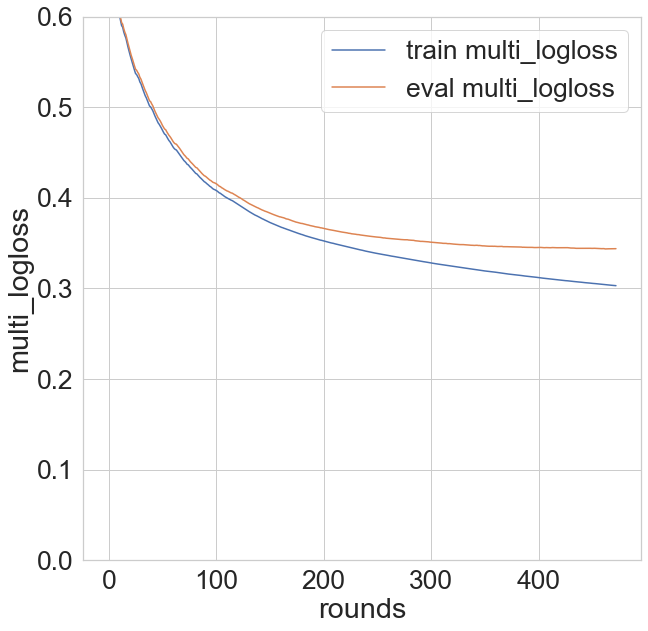

In [18]:
plt.figure(figsize=(10, 10))

plt.plot(train_metric, label='train multi_logloss')
plt.plot(eval_metric, label='eval multi_logloss')
plt.grid()
plt.legend()
plt.ylim(0 , 0.6)

plt.xlabel('rounds')
plt.ylabel('multi_logloss')
plt.grid(True)
plt.show()

0.7112195893781085


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

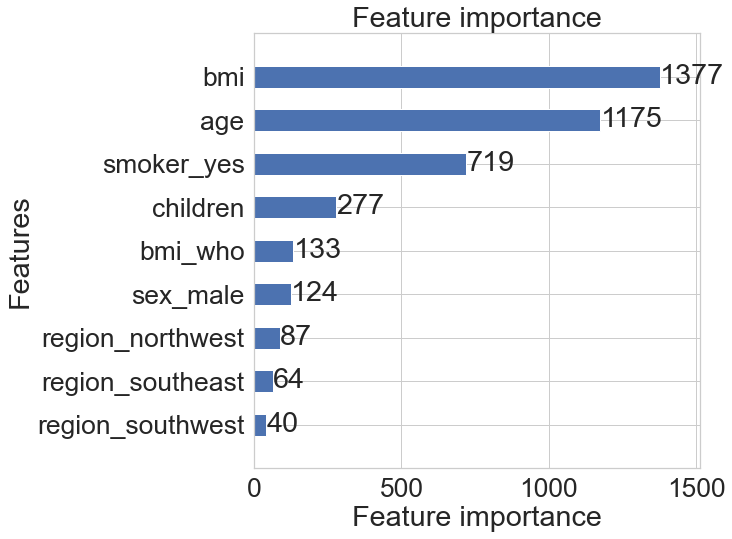

In [19]:
y_lgb_oof_train_max = np.argmax(y_lgb_oof_train, axis=1)
print(f1_score(y_true=y_train, y_pred=y_lgb_oof_train_max, average='macro'))

# LGB plog importance
lgb.plot_importance(gbm, height=0.5, figsize=(8,8))

In [20]:
y_pred_max = np.argmax(sum(y_lgb_preds)/len(y_lgb_preds), axis=1)
y_pred_max = list(y_pred_max)
y_pred_max[:10]

[0, 2, 0, 0, 0, 0, 0, 0, 0, 0]

In [21]:
submit_sample.head()

,0,1
0,13,0
1,23,0
2,27,0
3,28,0
4,29,0


提出

In [22]:
submit_sample[1] = y_pred_max
submit_sample.to_csv('submit.csv',index = False,  header=None)

In [23]:
submit_sample.head()

,0,1
0,13,0
1,23,2
2,27,0
3,28,0
4,29,0
